## Importing and restoring data

First, we import Stats from `socialysis` and restore our data.

In [70]:
from socialysis import Stats
stats=Stats(restore='sample')

## Loading the data

Before we can do our analysis, we need to load the data we generated into the classes that deal with it. This is done with `stats.load()`. Without loading the data, you will not be able to use or access any of `Stats`' attributes/modules except for the `data` attribute.

`SubModules` parameter is used to specify which submodules (media, words, emoji, etc.) should be loaded along with the main module. The `chat_instances` parameter specifies whether instances of chats should be created or not. 

In this tutorial, we will be performing analysis on all messages, so we will not be including any submodules. By default, all submodules are loaded. Chat instances will be created later in this tutorial.

In [71]:
stats.load(SubModules=[],chat_instances=False)


## Using `Stats` attributes

Now that the data has been loaded, we can access the following attributes of `Stats`:

`n_of_messages`: The count of all messages.<br>
`top_chats`: The top 5 chats in terms of number of messages. <br>
`languages`: The all languages used in your chat and their percentages (up to 3 languages). <br>
`first_chat`: The first ever person you chatted with. <br>
`top_streaks`: The top 10 longest chatting streaks. <br>
`longest_msgs`: Information about the longest 10 messages in terms of word  count.<br> 

Here are some examples of how to use these attributes:

In [3]:
print(f"Count of all messages : {stats.n_of_messages}")
print(f"Top 5 chats : {stats.top_chats}")
print(f"Top 3 used languages : {stats.languages}")
print(f"First ever chat : {stats.first_chat}")
print(f"Top 10 Longest chatting streaks :\n\t {stats.top_streaks.to_dict()}")


Count of all messages : 100000
Top 5 chats : ['Hanna Rush', 'Halle Matthews', 'Malik Foley', 'Mae Hooper', 'Joseph Gregory']
Top 3 used languages : [{'ARABIC': '99%'}]
First ever chat : Eden Lucero
Top 10 Longest chatting streaks :
	 {'Hanna Rush': 157, 'Joseph Gregory': 119, 'Mae Hooper': 116, 'Malik Foley': 48, 'Gertrude Walker': 45, 'Halle Matthews': 29, 'Katrina Gilmore': 21, 'Flynn Mercado': 20, 'Honey Cordova': 12, 'Olivier Davila': 10}


## Creating charts with data
To create charts with your data, you can use the `stats.plot` object. This object allows you to create several different types of charts, including bar charts, line charts, pie charts, sunbrust charts, dot charts, and gantt charts.

###  Bar charts
You can create many variations of bar plots such as chat bars vs counts,
bars vs datetime, chats vs datetime and chat subplots.<br>
lets start with bar charts.

#### Chat bars
To create a bar chart using the `stats.plot.bar()` method, you need to set the `per_chat` parameter to `True`. This will create a bar chart with one bar for each chat in the data

<AxesSubplot:title={'center':'The 5 Chats with the highest count of Messages'}, ylabel='COUNT OF MESSAGES'>

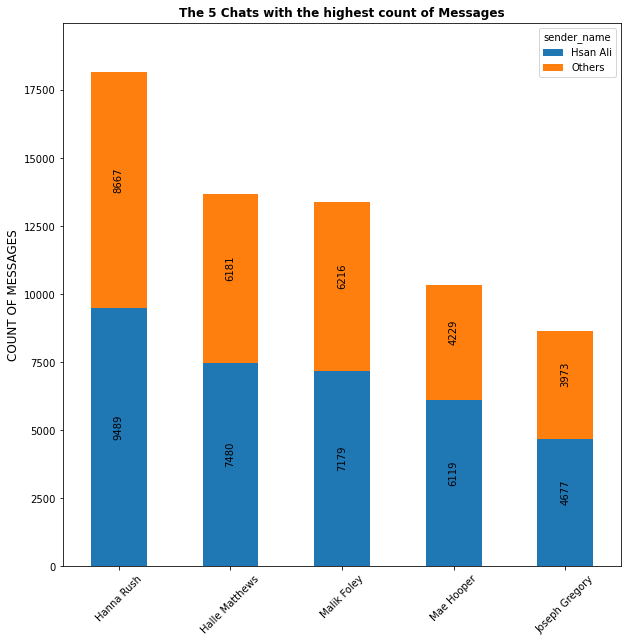

In [4]:
stats.plot.bar(per_chat=True)


You can customize the appearance of the bar chart by setting additional options, such as `stacked` and `rot`,
`stacked` parameter controls whether the bars are stacked or not. By default, the bars are stacked, but you can set `stacked=False` to create a bar chart with separate bars for each sender. This can be useful for visualizing the contribution of each sender to the total number of messages for a chat. The `rot` parameter can be used to rotate the x-axis labels by a specified number of degrees.


<AxesSubplot:title={'center':'The 5 Chats with the highest count of Messages'}, ylabel='COUNT OF MESSAGES'>

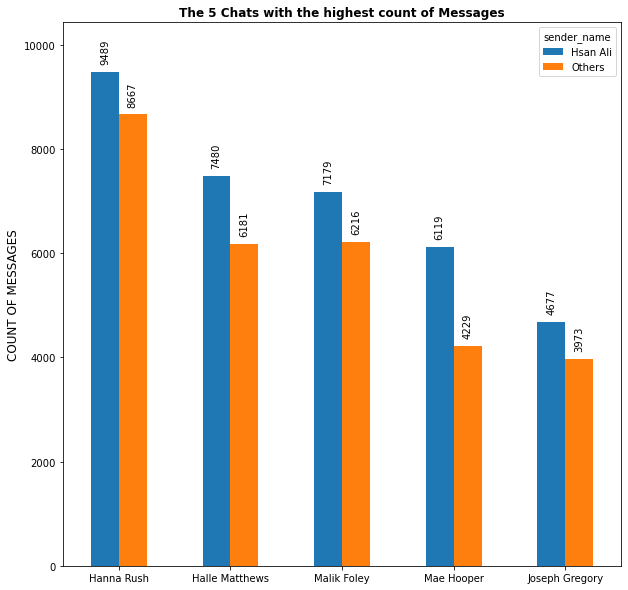

In [5]:
stats.plot.bar(per_chat=True, stacked=False, rot=0)


The `n` parameter can be used to limit the number of bars in the chart to a specific number. This can be useful if you want to focus on the top N chats, 


<AxesSubplot:title={'center':'The 8 Chats with the highest count of Messages'}, ylabel='COUNT OF MESSAGES'>

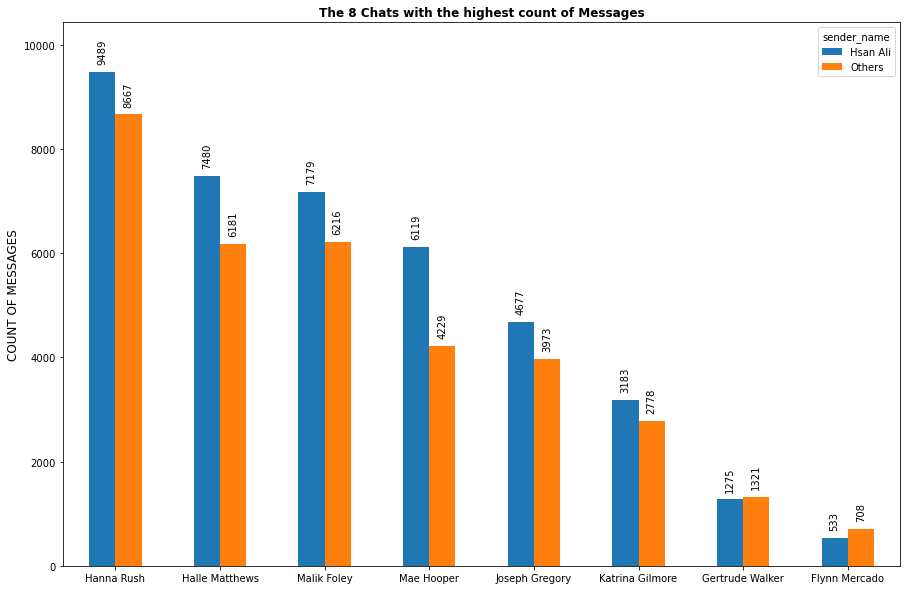

In [6]:
stats.plot.bar(per_chat=True, n=8, stacked=False, rot=0, figsize=(15,10))

`show_sender` parameter can be used to control whether the sender is included in the bar chart or not. By default, the sender is included, but you can set `show_sender=False` to create a bar chart that ignores the sender and focuses only on the total number of messages for each chat.

<AxesSubplot:title={'center':'The 5 Chats with the highest count of Messages'}, ylabel='COUNT OF MESSAGES'>

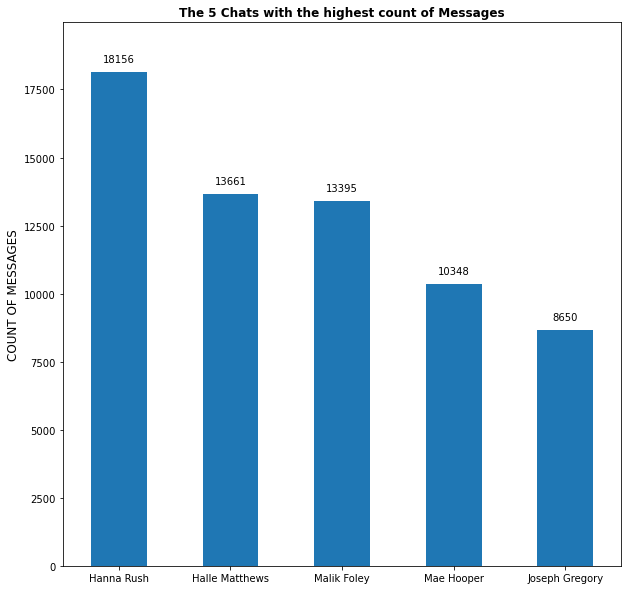

In [7]:
stats.plot.bar(per_chat=True, show_sender=False, rot=0)


#### Bars versus datetime


To create a bar chart that compares the data over time, you can set the `over_time` option to `True`.This will create a bar chart with one bar for each time period (e.g. month, week, day, etc.), and the height of each bar will represent the total number of messages in the data for that time period. 



<AxesSubplot:title={'center':' Monthly Timeline of the count of Messages '}, ylabel='COUNT OF MESSAGES'>

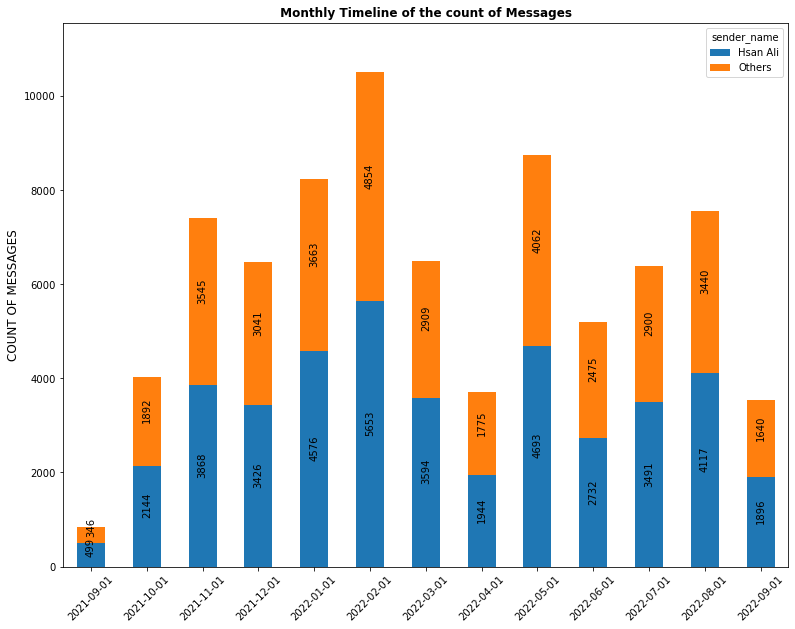

In [8]:
stats.plot.bar(over_time=True)


You can customize the appearance of the bar chart by setting additional options, such as `stacked` and `figsize`, `figsize` parameter can be used to specify the size of the chart.

<AxesSubplot:title={'center':' Monthly Timeline of the count of Messages '}, ylabel='COUNT OF MESSAGES'>

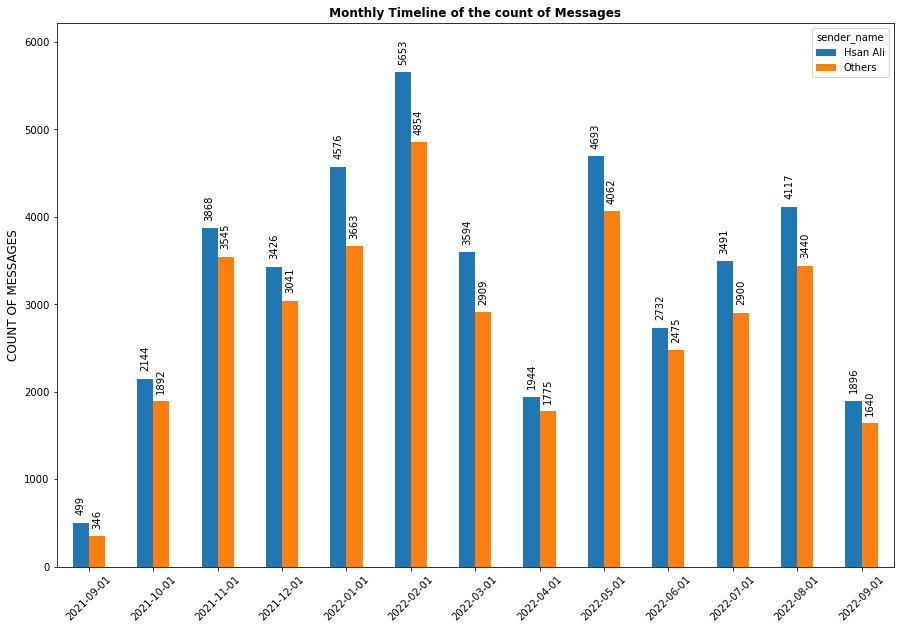

In [9]:
stats.plot.bar(over_time=True, stacked=False, figsize=(15,10))


To hide the values annotation in the chart, you can set the `label` option to `False`:

<AxesSubplot:title={'center':' Monthly Timeline of the count of Messages '}, ylabel='COUNT OF MESSAGES'>

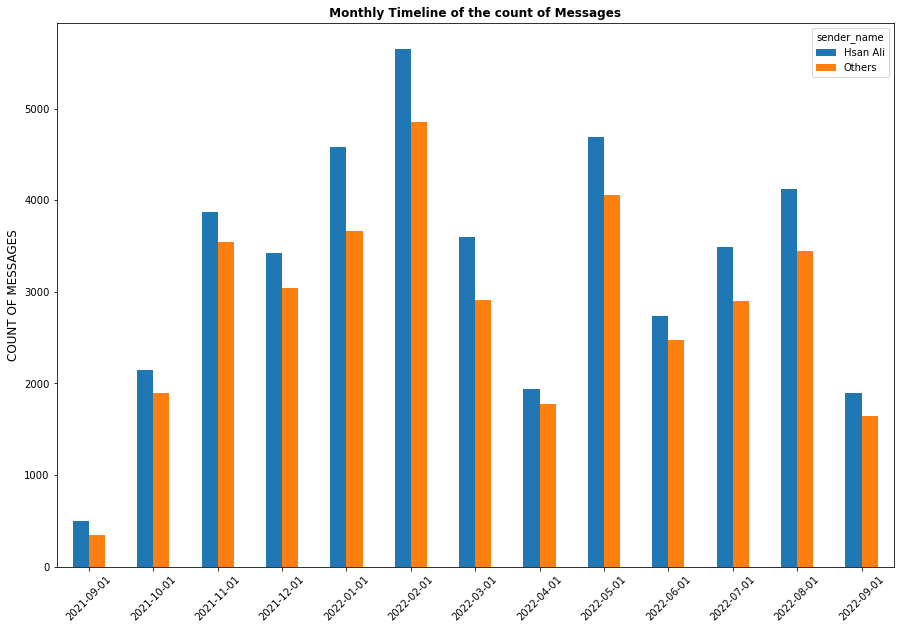

In [10]:
stats.plot.bar(over_time=True, stacked=False, figsize=(15,10), label=False)


`label_rot` parameter used to change the rotation of the labels or annotations in the plot. This can be useful for making the plot more readable or for fitting longer labels into the plot area. 

<AxesSubplot:title={'center':' Monthly Timeline of the count of Messages '}, ylabel='COUNT OF MESSAGES'>

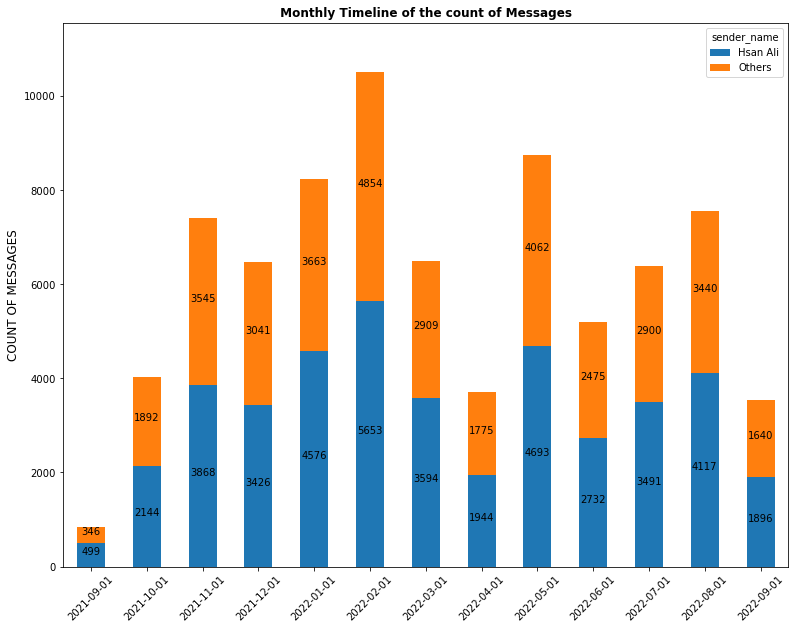

In [11]:
stats.plot.bar(over_time=True,label_rot=0)


#### Chats vs. datetime
What about merging chats and time together?
To create a bar chart that shows both the chats and the time period on the x-axis, you can set both the `per_chat` and `over_time` parameters to `True`. This will create a bar chart with one bar for each chat-time period combination, and the height of each bar will represent the number of messages in the data for that combination. 



<AxesSubplot:title={'center':' Monthly Timeline of the count of Messages across Chats '}, ylabel='COUNT OF MESSAGES'>

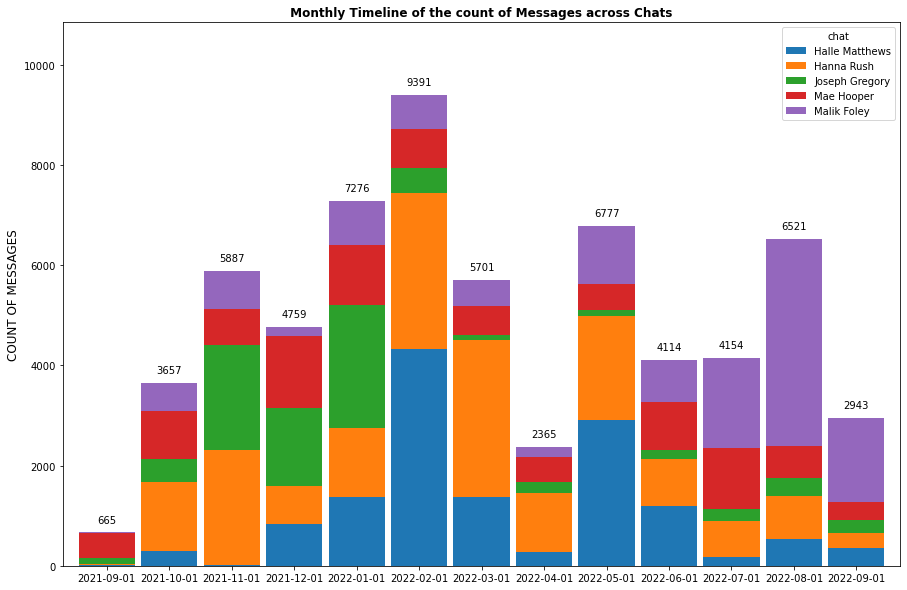

In [12]:
stats.plot.bar(per_chat=True, over_time=True, rot=0, figsize=(15,10))


If you set `legened` to `False` you will get bars vs. datetime but filtered for only the included chats.
This can be useful if you want to focus on a specific set of chats, rather than showing all the chats in the data.

<AxesSubplot:title={'center':' Monthly Timeline of the count of Messages across Chats '}, ylabel='COUNT OF MESSAGES'>

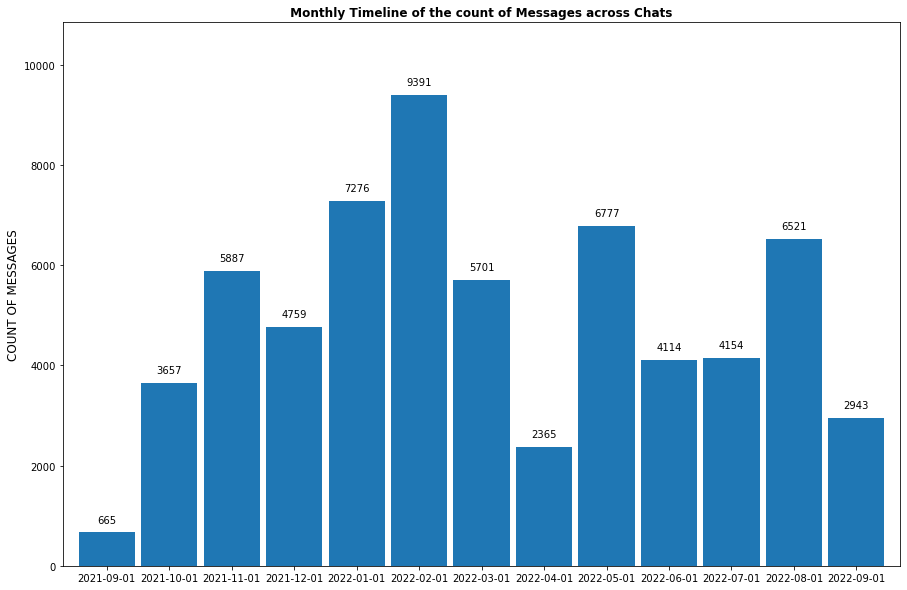

In [13]:
stats.plot.bar(per_chat=True,over_time=True,rot=0,figsize=(15,10),legend=False)

Compare it with the previously obtained bars vs. datetime plot to spot the difference.


<AxesSubplot:title={'center':' Monthly Timeline of the count of Messages '}, ylabel='COUNT OF MESSAGES'>

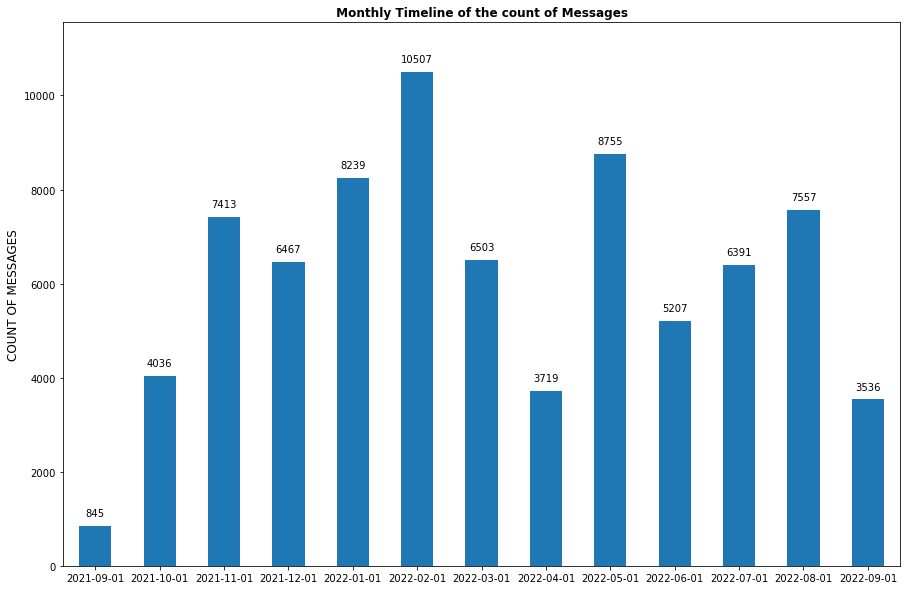

In [14]:
stats.plot.bar(over_time=True,rot=0,figsize=(15,10),show_sender=False)


To view each individual bar separately, set the `stacked` parameter to `False`.

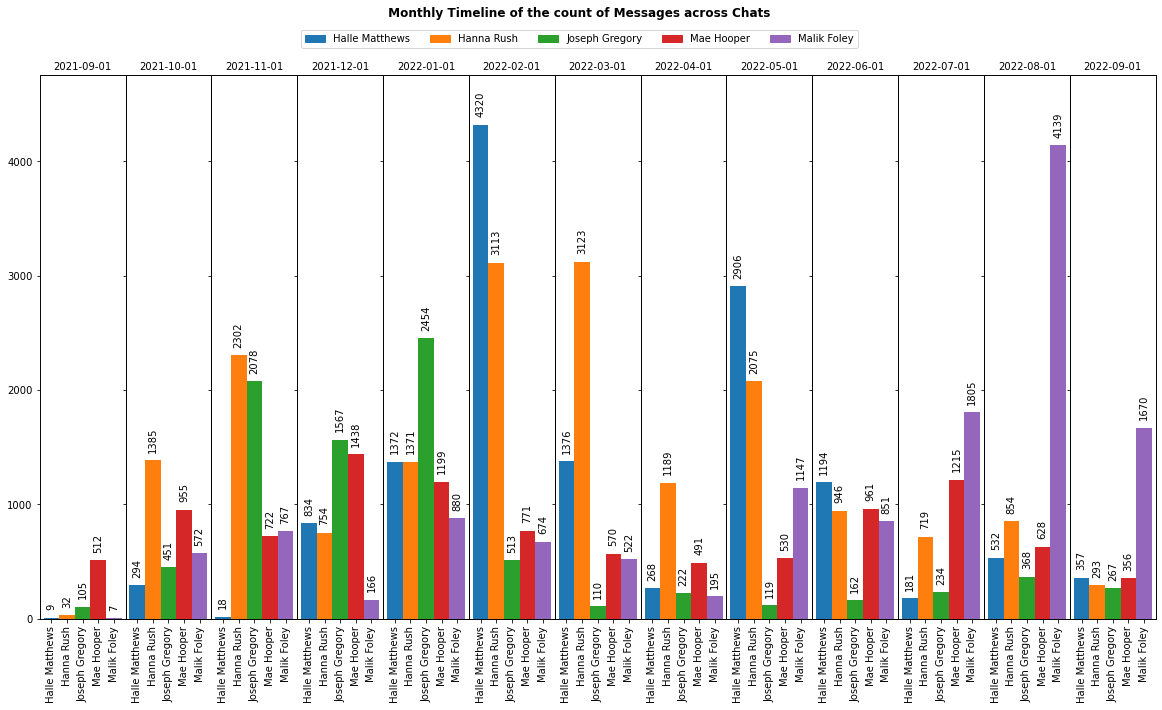

In [15]:
stats.plot.bar(per_chat=True,over_time=True,stacked=False,figsize=(20,10));

#### Chat subplots
To create a bar chart with subplots for each chat, you can set the `subplots` option to `True`:



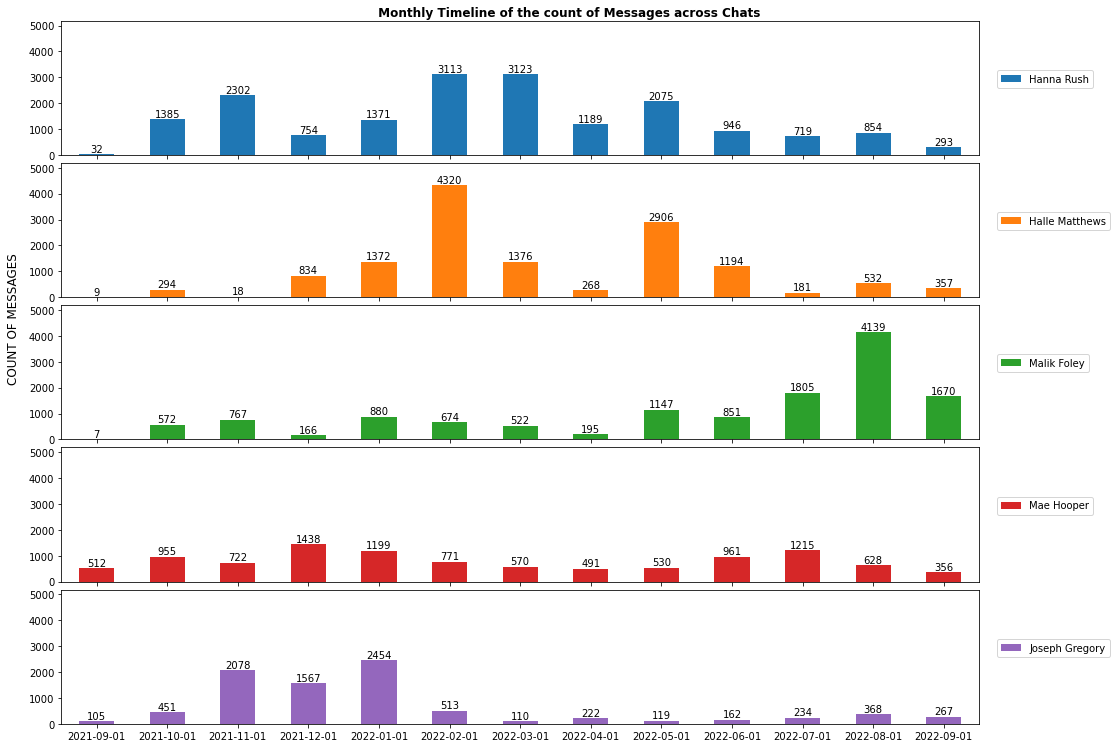

In [16]:
stats.plot.bar(per_chat=True, over_time=True, subplots=True, figsize=(15,10), rot=0);


#### Chat filters
There are many parameters that can be used to filter chats. You have already been introduced to the `n` parameter. Let's explore the other parameters that are available.

The `include` parameter can be used to select only specific chats to include in the results.

<AxesSubplot:title={'center':'The 4 Chats with the highest count of Messages'}, ylabel='COUNT OF MESSAGES'>

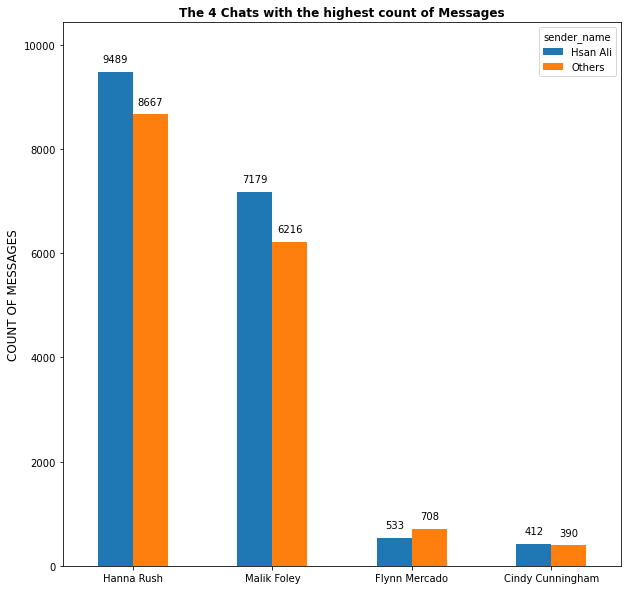

In [17]:
stats.plot.bar(per_chat=True,include=['Hanna Rush','Malik Foley','Flynn Mercado','Cindy Cunningham']
               ,stacked=False,label_rot=0,rot=0)

Use 'Top' to include only the top 5 people you have chatted with the most

<AxesSubplot:title={'center':'The 5 Chats with the highest count of Messages'}, ylabel='COUNT OF MESSAGES'>

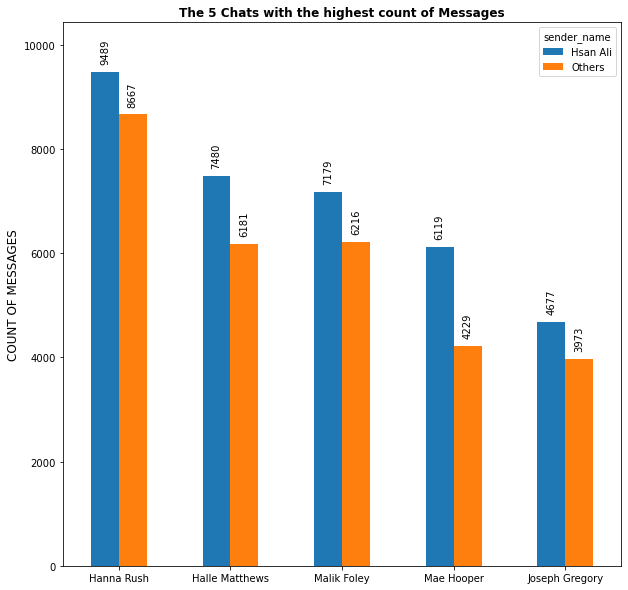

In [18]:

stats.plot.bar(per_chat=True,include='Top'
               ,stacked=False,rot=0)

`exclude` parameter can be used to exclude specific chats from the top `n` results.

<AxesSubplot:title={'center':'The 4 Chats with the highest count of Messages'}, ylabel='COUNT OF MESSAGES'>

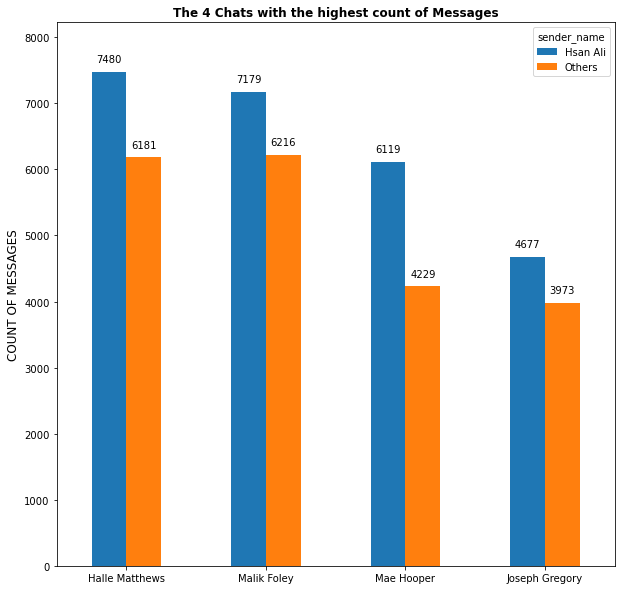

In [19]:
stats.plot.bar(per_chat=True,exclude=['Hanna Rush']
               ,stacked=False,label_rot=0,rot=0)

`others` parameter can be used to group any chats that are not included in the selected `n` or the `include` list, and label them as 'Others' in the plot.

<AxesSubplot:title={'center':'The 6 Chats with the highest count of Messages'}, ylabel='COUNT OF MESSAGES'>

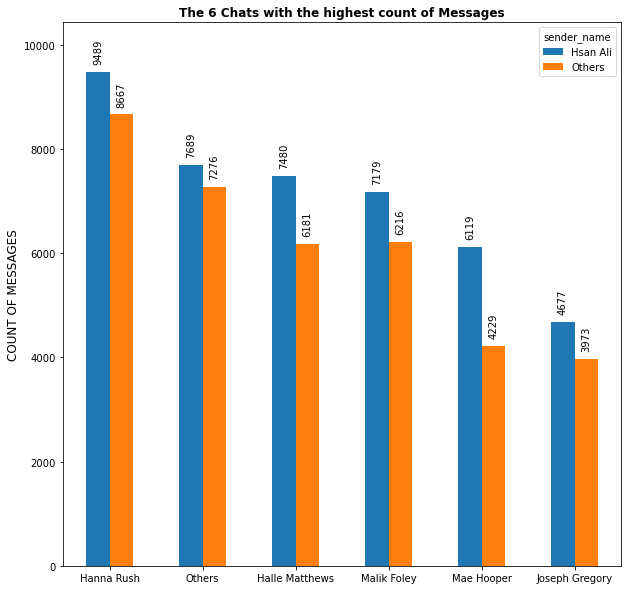

In [20]:
stats.plot.bar(per_chat=True,others=True,stacked=False,rot=0)

`chat_groups` parameter can be used to group chats in the plot.

<AxesSubplot:title={'center':'The 2 Chats with the highest count of Messages'}, ylabel='COUNT OF MESSAGES'>

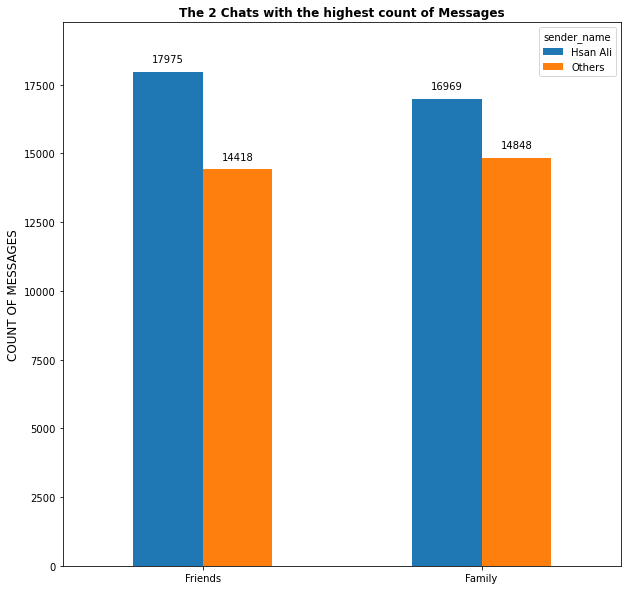

In [21]:
stats.plot.bar(per_chat=True,stacked=False,rot=0,label_rot=0,chat_groups={'Hanna Rush':'Family',
                                                                        "Halle Matthews":"Family",
                                                                        "Malik Foley":"Friends",
                                                                        "Mae Hooper" : "Friends",
                                                                        "Joseph Gregory" :"Friends"})

If any chat appears in the plot and is not mapped to a group, it will be shown as 'Others' in the plot.

<AxesSubplot:title={'center':'The 3 Chats with the highest count of Messages'}, ylabel='COUNT OF MESSAGES'>

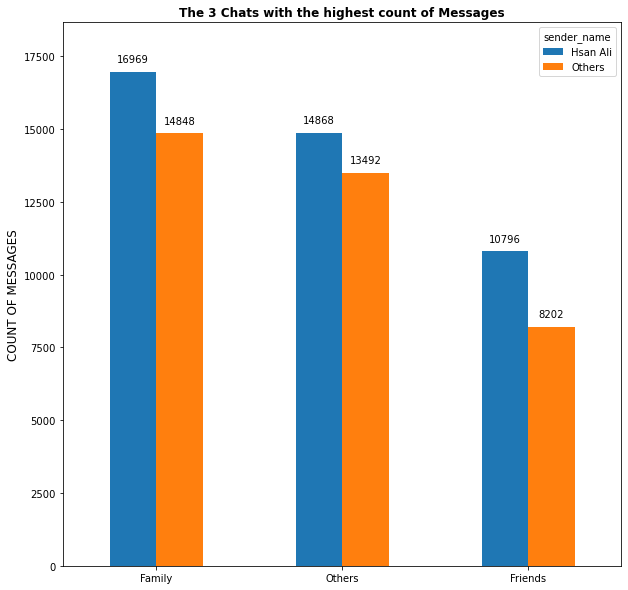

In [22]:
stats.plot.bar(per_chat=True,others=True,stacked=False,rot=0,label_rot=0,chat_groups={'Hanna Rush':'Family',
                                                                        "Halle Matthews":"Family",
                                                                        "Mae Hooper" : "Friends",
                                                                        "Joseph Gregory" :"Friends"})

The `asc` parameter can be used to sort the results in ascending order, showing the chats with the lowest count first.

<AxesSubplot:title={'center':'The 10 Chats with the highest count of Messages'}, ylabel='COUNT OF MESSAGES'>

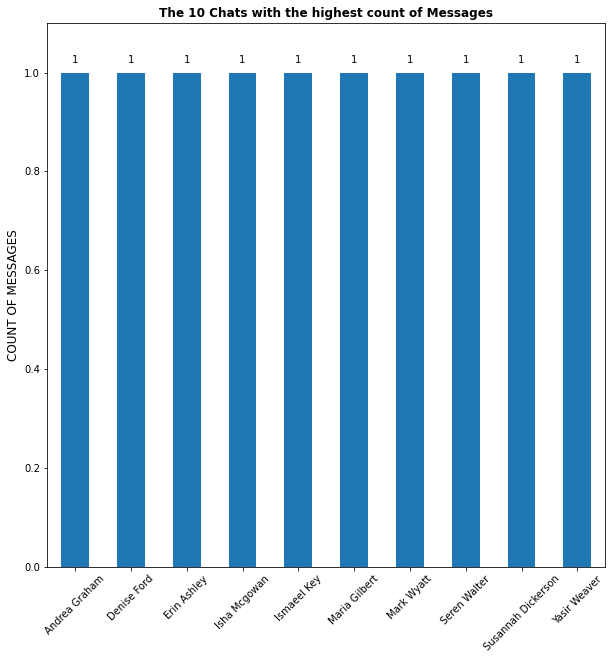

In [23]:
stats.plot.bar(per_chat=True,others=False,stacked=False,rot=45,asc=True,show_sender=False,n=10,)

#### Datetime manipulation

The `dt_hrchy` parameter can be used to select the hierarchy or granularity of the datetime variable. For example, if the datetime variable includes information about the year, month, and day, you can use the dt_hrchy parameter to specify whether you want to group the data by year, month, or day. For more information about the allowed values for the `dt_hrchy` parameter, please refer to the documentation.

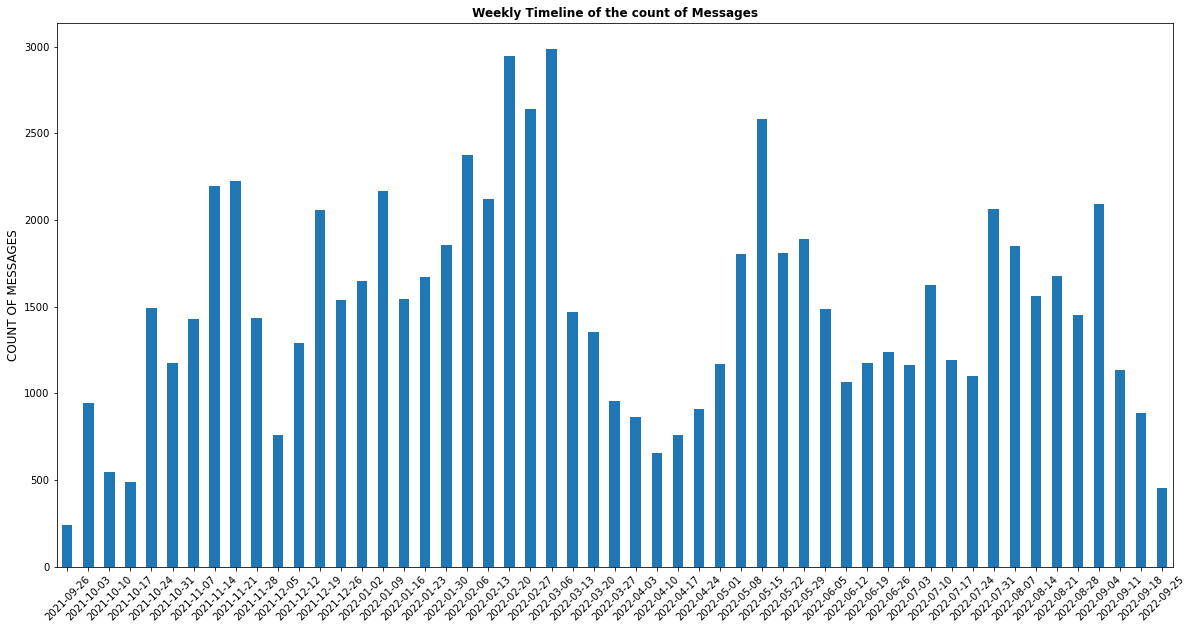

In [24]:
stats.plot.bar(over_time=True,dt_hrchy='week',show_sender=False,figsize=(20,10),label=False);


The `dt_range` parameter can be used to select a range of dates to plot the data within. This can be useful for narrowing down the data to a specific time period, such as a particular month or year. For more information about the allowed values for the `dt_range` parameter, please refer to the documentation.

<AxesSubplot:title={'center':' Daily Timeline of the count of Messages '}, ylabel='COUNT OF MESSAGES'>

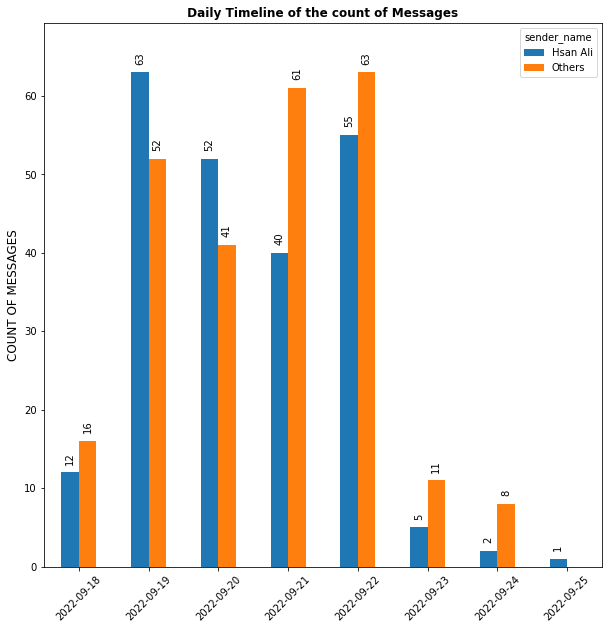

In [25]:
stats.plot.bar(over_time=True,dt_range='last week', dt_hrchy='day',stacked=False)

Please note that the `dt_range` parameter is set to 'last year' by default in order to avoid processing too much data and generating messy, long charts.<br>
You can set the dt_range parameter to `None` or `['Start', 'End']` to plot the full range of data. This may result in a longer and potentially more complex chart.

<AxesSubplot:title={'center':' Monthly Timeline of the count of Messages '}, ylabel='COUNT OF MESSAGES'>

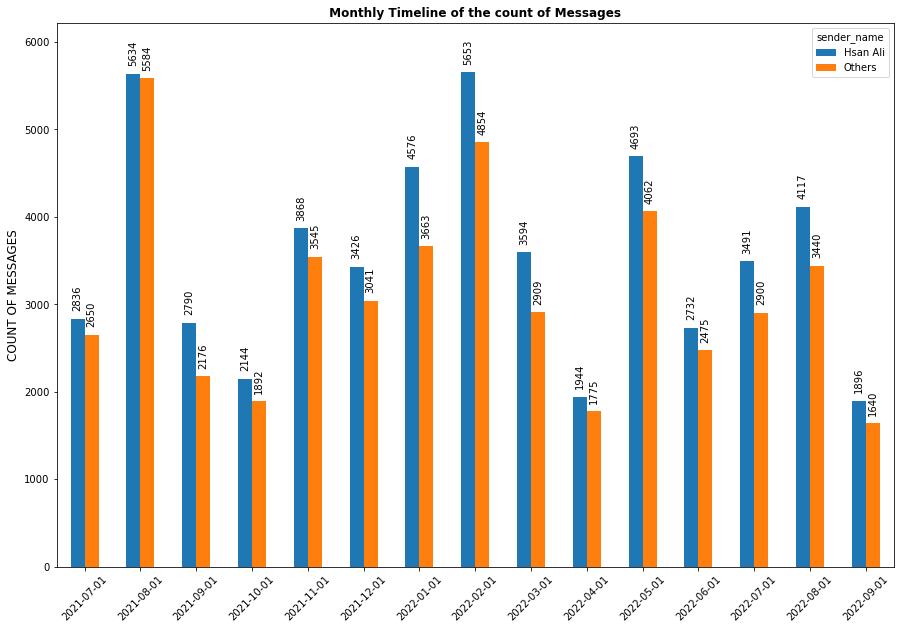

In [26]:
stats.plot.bar(over_time=True,dt_range=None, dt_hrchy='month',stacked=False)

The `dt_disc` parameter can be used to convert the datetime variable to a discrete variable. By setting the `dt_disc` parameter to `True`, the datetime values will be grouped into discrete bins or categories, rather than being treated as continuous values

<AxesSubplot:title={'center':' Monthly Timeline of the count of Messages '}, ylabel='COUNT OF MESSAGES'>

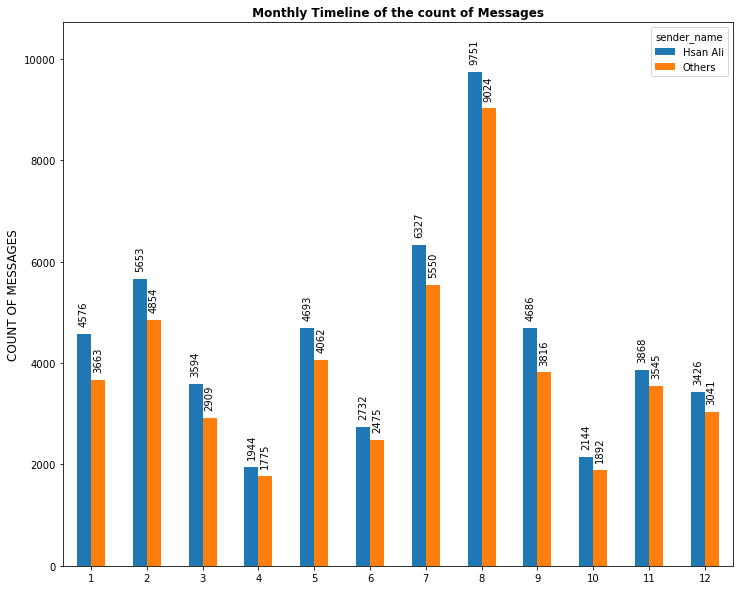

In [27]:
stats.plot.bar(over_time=True,dt_range=None, dt_hrchy='month',stacked=False,dt_disc=True,rot=0)


Note how the months are treated as categories with numerical values (e.g. 1, 2, 3, etc.) rather than as specific dates (e.g. 2020-01, 2021-01, etc.). This means that the months will be plotted in the order in which they appear in the data, rather than in chronological order.

The `dt_groups` parameter can be used to group datetime values, similar to the way that the `chat_groups` parameter is used to group chats. This parameter is only applicable when the `dt_disc` parameter is set to `True`, and it can be used in the same way as the `chat_groups` parameter. For example, you can use the `dt_groups` parameter to group the months into seasons, or to group the days of the week into weekdays and weekends. 

<AxesSubplot:title={'center':' Hourly Timeline of the count of Messages '}, ylabel='COUNT OF MESSAGES'>

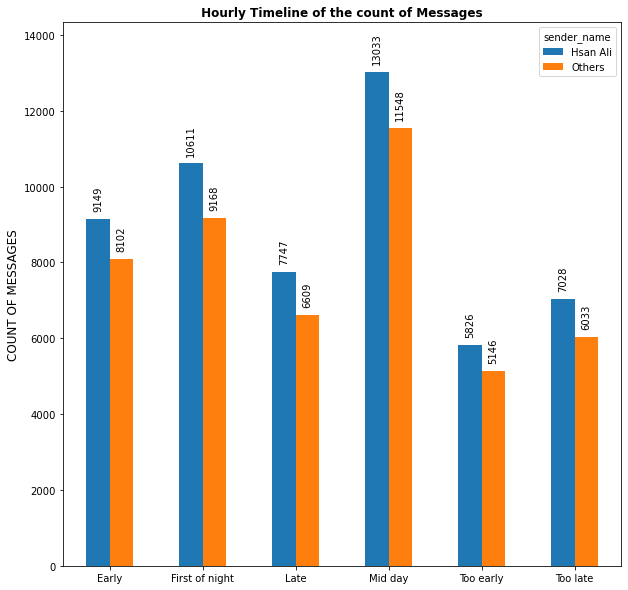

In [28]:
stats.plot.bar(over_time=True,dt_range=None, dt_hrchy='hour',stacked=False,dt_disc=True,rot=0,
              dt_groups={**dict.fromkeys([1,2,3], 'Too late'), 
        **dict.fromkeys([4,5,6], 'Too early'),
        **dict.fromkeys([7,8,9,10,11], 'Early'),
        **dict.fromkeys([12,13,14,15,16,17], 'Mid day'),
        **dict.fromkeys([18,19,20,21], 'First of night'),
        **dict.fromkeys([22,23,0], 'Late')})

Note that the `dt_range` parameter is applied even if you are not plotting time values. This means that if you set the `dt_range` parameter to a specific range of dates, the data will be filtered to include only values within that range, even if you are not plotting the data by date. This can be useful for narrowing down the data to a specific time period

<AxesSubplot:title={'center':'The 5 Chats with the highest count of Messages'}, ylabel='COUNT OF MESSAGES'>

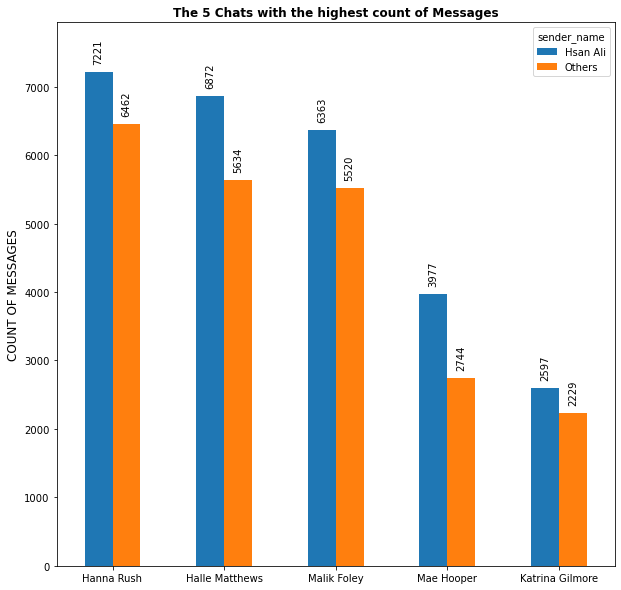

In [29]:
stats.plot.bar(per_chat=True,dt_range=['2022','End'],stacked=False,rot=0)

You can apply chat filters and manipulate the time values in the data at the same time, For example, you can use the `n`, `include`, and `exclude` parameters to select a specific set of chats to include or exclude from the data, and use the `dt_hrchy`, `dt_range`, and `dt_disc` parameters to control the granularity, range, and discreteness of the time values in the data. By combining these parameters, you can create a customized view of the data.

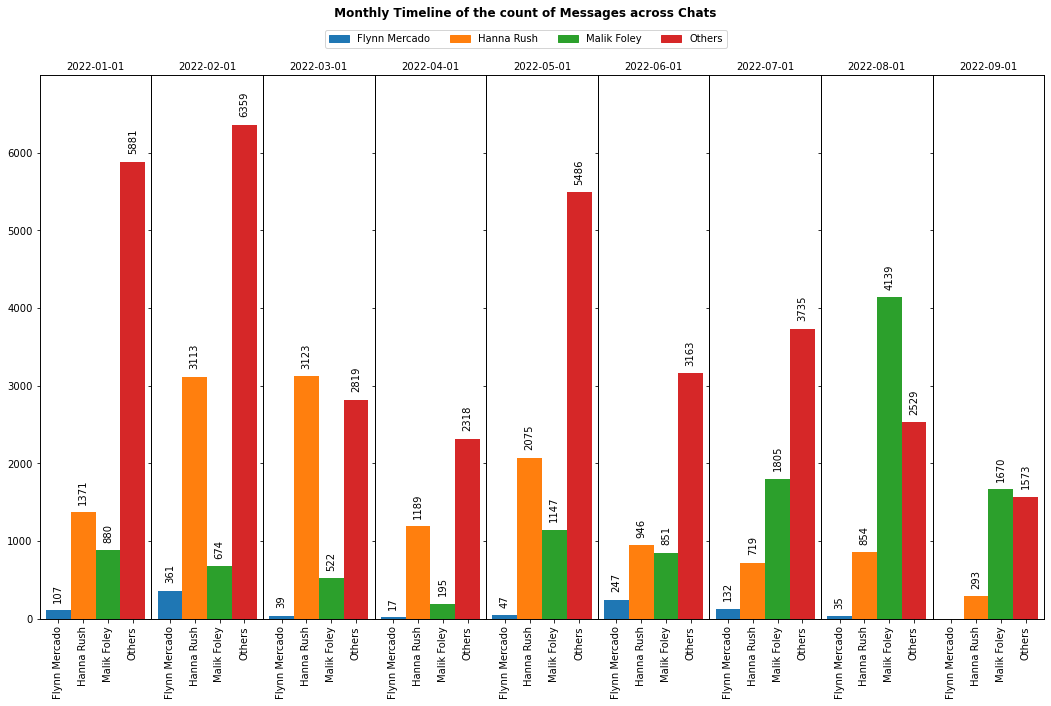

In [30]:
stats.plot.bar(per_chat=True,over_time=True,include=['Hanna Rush','Malik Foley','Flynn Mercado'],others=True,
               dt_range=['2022','End'],stacked=False);

To see the incremental increase of your values over time, you can use running or moving aggregation. This can be useful for tracking the growth or evolution of number of messages over time. To enable running or moving aggregation, simply set the `cumulative` parameter to `True`. This will cause the values to be plotted as a cumulative sum, showing the total amount at each point in time rather than the individual value at each point

<AxesSubplot:title={'center':'Cumulative Monthly Timeline of the count of Messages (Running SUM)'}, ylabel='COUNT OF MESSAGES'>

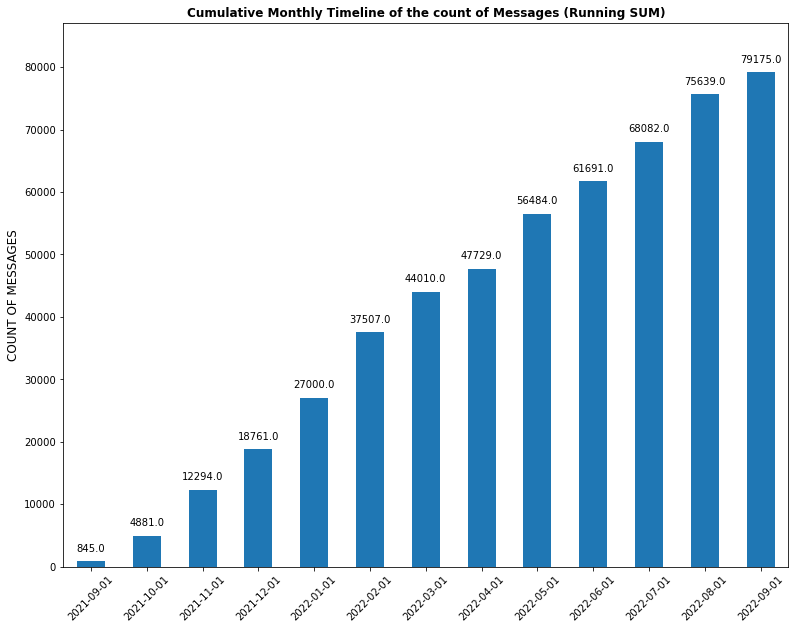

In [31]:
stats.plot.bar(over_time=True,cumulative=True,show_sender=False)

By default, the 'sum' aggregation function is used for cumulation when the `cumulative` parameter is set to `True`. This means that the values will be summed together at each point in time to produce the cumulative total. However, you can change this behavior by using the `cum_aggr` parameter to specify a different aggregation function. For example, you could use the `mean` function to calculate the average value at each point in time, or you could use the `min` or `max` functions to track the minimum or maximum value over time.

<AxesSubplot:title={'center':'Cumulative Monthly Timeline of the count of Messages (Running MEAN)'}, ylabel='COUNT OF MESSAGES'>

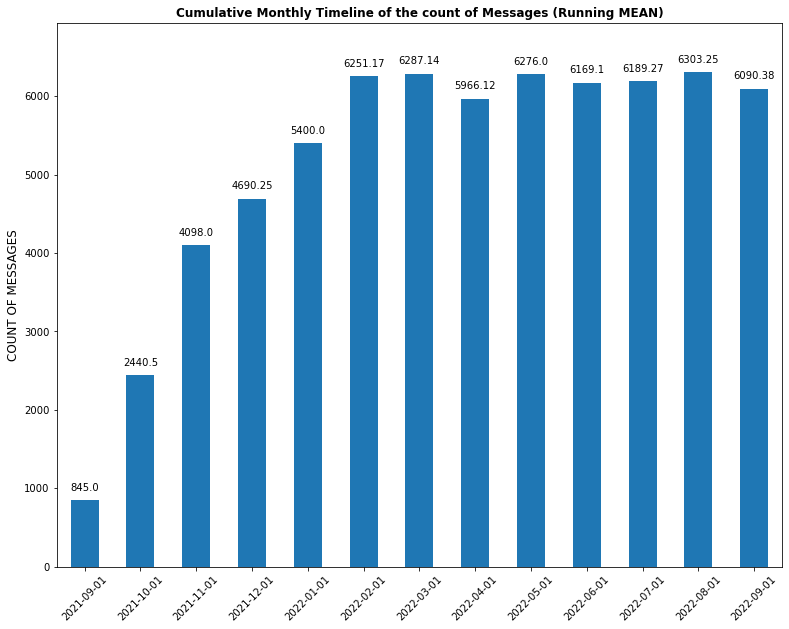

In [32]:
stats.plot.bar(over_time=True,cumulative=True,show_sender=False,cum_aggr='mean')

By default, the aggregation window is set to the length of the data when calculating moving or running aggregation. This means that the entire dataset will be used to calculate the cumulative or moving total. However, you can use the `window` parameter to specify a different window size for the aggregation. For example, you could use a window size of 7 to calculate a moving average over the last 7 days, or you could use a window size of 30 to calculate a moving average over the last 30 days

<AxesSubplot:title={'center':'Cumulative Monthly Timeline of the count of Messages (Moving SUM with window = 3)'}, ylabel='COUNT OF MESSAGES'>

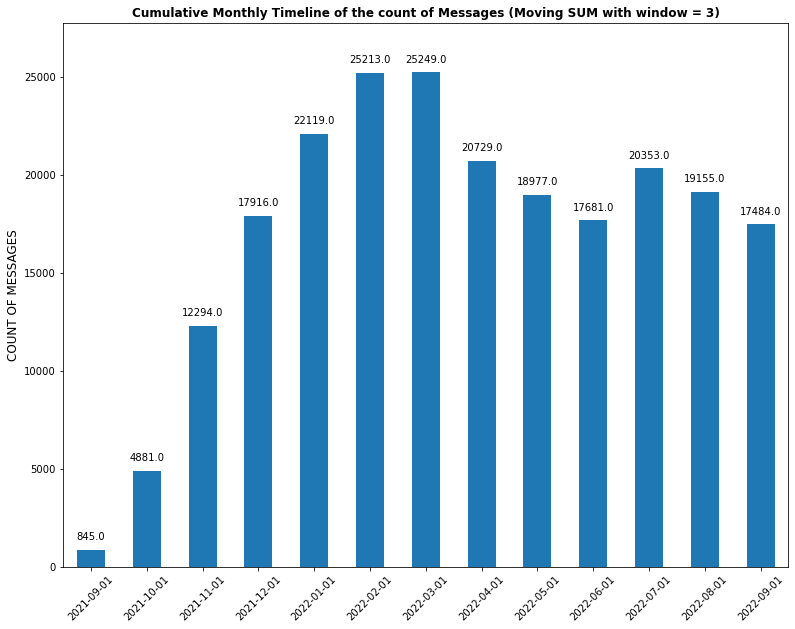

In [33]:
stats.plot.bar(over_time=True,cumulative=True,show_sender=False,cum_aggr='sum',window=3)

If you want to inspect the data used to generate a plot, you can set the `return_data` parameter to `True` to return a crosstab of the data. This can be useful for exploring the underlying data in more detail, or for using the data for further analysis or visualization.

In [34]:
stats.plot.bar(per_chat=True,over_time=True,dt_range=['2020','End'],return_data=True)

chat,Halle Matthews,Hanna Rush,Joseph Gregory,Mae Hooper,Malik Foley
timestamp_ms,,,,,
2021-07-01,371,2160,836,1248,113
2021-08-01,2230,4792,1337,1244,382
2021-09-01,1050,718,464,1804,262
2021-10-01,294,1385,451,955,572
2021-11-01,18,2302,2078,722,767
2021-12-01,834,754,1567,1438,166
2022-01-01,1372,1371,2454,1199,880
2022-02-01,4320,3113,513,771,674
2022-03-01,1376,3123,110,570,522


You can use the `style` parameter to create a highlighted table of the data. This can make the data easier to read and understand, and can provide additional context for interpreting the results. To enable the highlighting, simply set the `style` parameter to `True`
This can make it easier to read and interpret the crosstab, and it can also add a visual element to the output.

In [72]:
stats.plot.bar(per_chat=True,over_time=True,dt_range=['2020','End'],return_data=True,style=True)

chat,Halle Matthews,Hanna Rush,Joseph Gregory,Mae Hooper,Malik Foley
timestamp_ms,,,,,
2021-07-01,371,2160,836,1248,113
2021-08-01,2230,4792,1337,1244,382
2021-09-01,1050,718,464,1804,262
2021-10-01,294,1385,451,955,572
2021-11-01,18,2302,2078,722,767
2021-12-01,834,754,1567,1438,166
2022-01-01,1372,1371,2454,1199,880
2022-02-01,4320,3113,513,771,674
2022-03-01,1376,3123,110,570,522


The `sort` parameter is only used when the `per_chat` and `over_time` parameters are both set to `True`. It is used to choose between a fixed selection of chats or a dynamic selection of chats for the plot. When `sort` is set to `fixed`, the top chats for the selected `dt_range` will be used for each time interval on the chart. This means that the same set of chats will be used for all time intervals, regardless of how the data changes over time. In contrast, when `sort` is set to `dynamic`, each time interval will have its own top chats, based on the data for that interval. This means that the chats included in the plot may change over time, depending on how the data changes. 

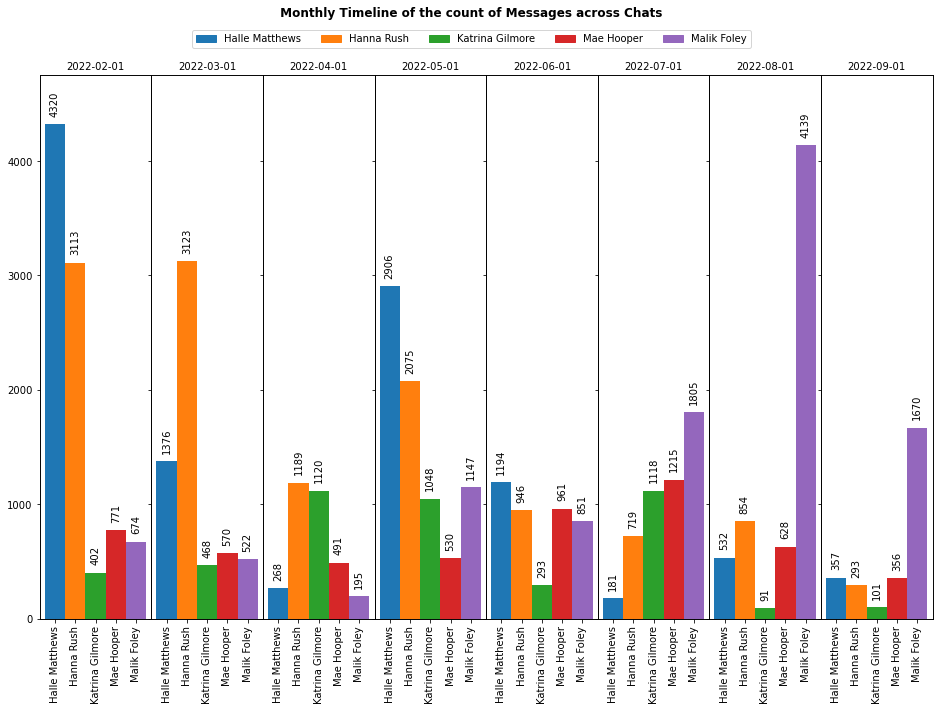

In [36]:
stats.plot.bar(per_chat=True,over_time=True,stacked=False,dt_range=['2022-02','End'],
              sort='fixed');

If you set the `sort` parameter to `dynamic`, you will notice that each time interval (such as a month) will have its own set of top chats, based on the data for that interval. This means that the relative rankings of the chats may change over time, depending on the data. You can also see how the chats are sorted within each interval, depending on the values of the metric being plotted. 

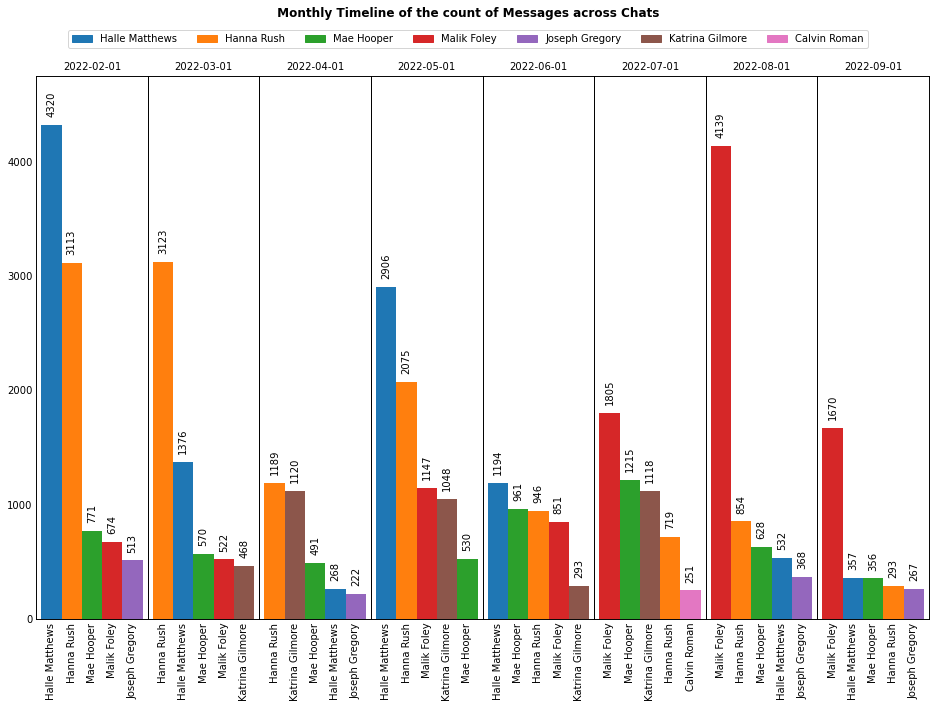

In [37]:
stats.plot.bar(per_chat=True,over_time=True,stacked=False,dt_range=['2022-02','End'],
              sort='dynamic');

We have enough bars, so let's create some lines.

### Line chart

To create a line plot using the `stats.plot.line()` method, you can set the `per_chat` parameter to `False`. This will cause the method to plot the data as a single line that shows the overall trend or pattern in the data.

<AxesSubplot:title={'center':' Monthly Timeline of the count of Messages '}, ylabel='COUNT OF MESSAGES'>

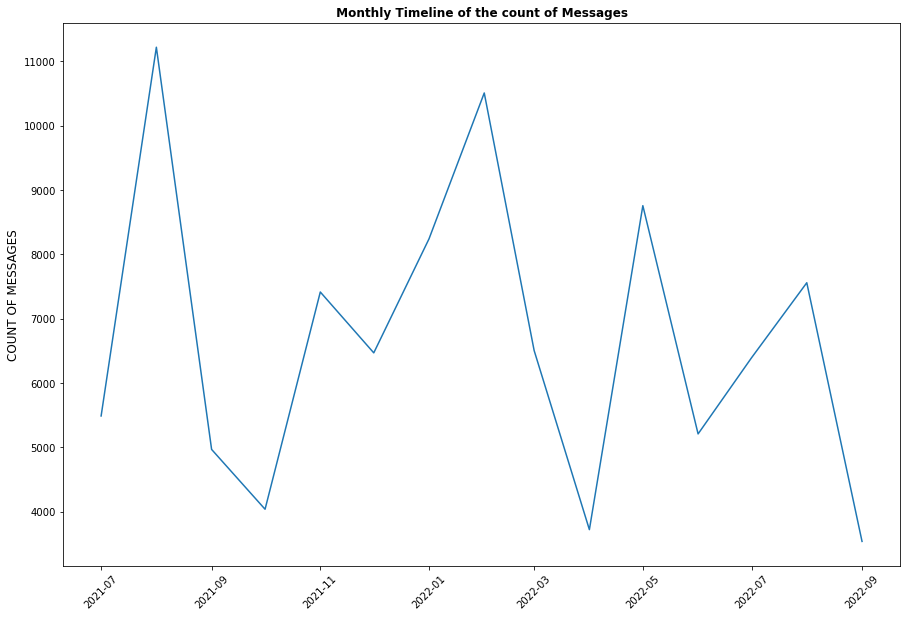

In [38]:
stats.plot.line(per_chat=False,dt_range=None)

When the `per_chat` parameter is set to False, `stats.plot.line` will create a single line plot with data from all chats combined. If the `show_sender` parameter is set to `True`, the plot will display two lines, one for messages you sent and another for messages you received. 

<AxesSubplot:title={'center':' Monthly Timeline of the count of Messages '}, ylabel='COUNT OF MESSAGES'>

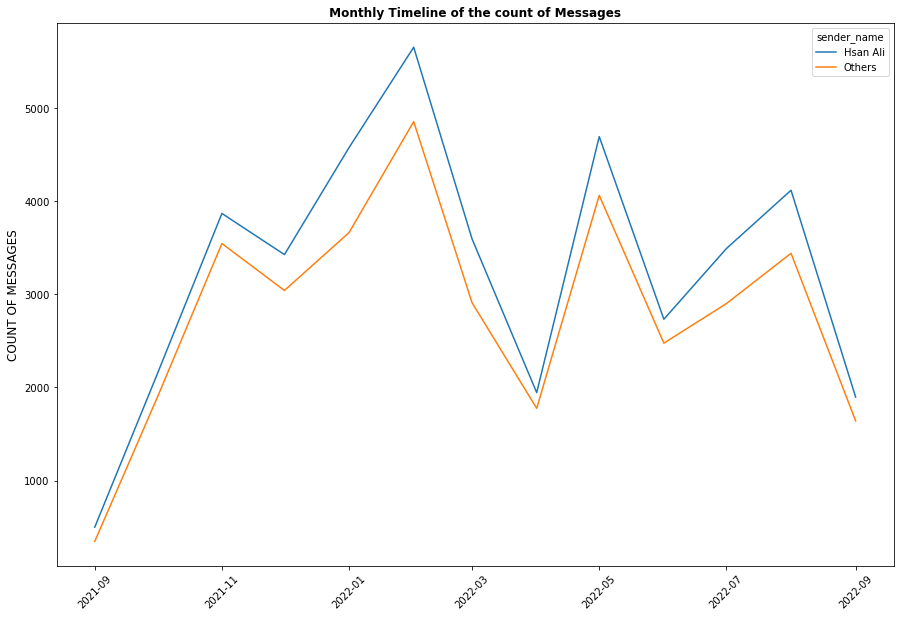

In [39]:
stats.plot.line(per_chat=False,show_sender=True)

The parameters for manipulating datetime, filtering chats, and customizing appearance are still applicable here.

<AxesSubplot:title={'center':' Daily Timeline of the count of Messages '}, ylabel='COUNT OF MESSAGES'>

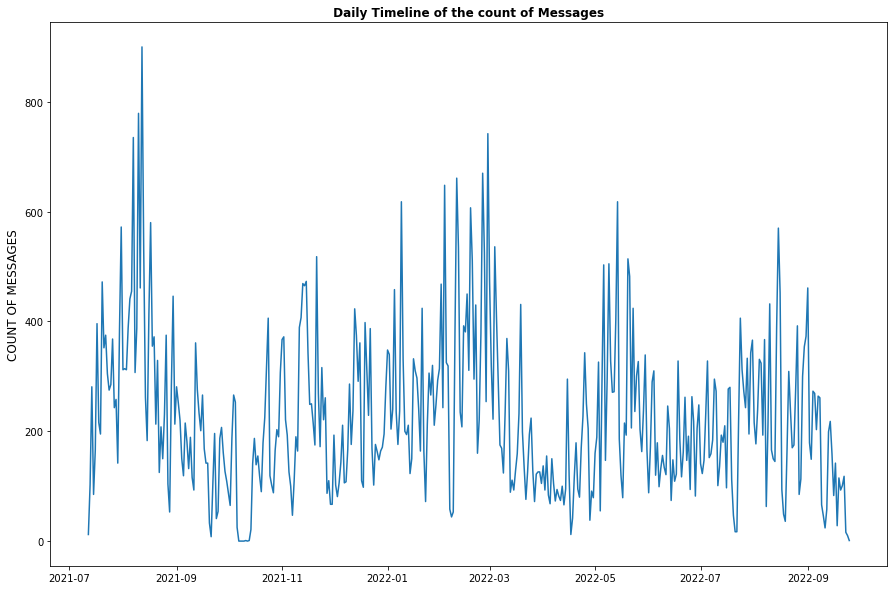

In [40]:
stats.plot.line(per_chat=False,dt_range=None,dt_hrchy='day',figsize=(15,10),rot=0)

In [41]:
stats.plot.line(per_chat=True,dt_range=None,dt_hrchy='month',rot=0,return_data=True,style=True)

chat,Hanna Rush,Halle Matthews,Malik Foley,Mae Hooper,Joseph Gregory
timestamp_ms,,,,,
2021-07-01,2160,371,113,1248,836
2021-08-01,4792,2230,382,1244,1337
2021-09-01,718,1050,262,1804,464
2021-10-01,1385,294,572,955,451
2021-11-01,2302,18,767,722,2078
2021-12-01,754,834,166,1438,1567
2022-01-01,1371,1372,880,1199,2454
2022-02-01,3113,4320,674,771,513
2022-03-01,3123,1376,522,570,110


To create a line plot that shows individual lines for each chat, you can set the `per_chat` parameter to `True`. This will plot a separate line for each chat. This can be useful for comparing the data for different chats, or for identifying specific patterns or trends within a single chat.

<AxesSubplot:title={'center':' Monthly Timeline of the count of Messages across Chats '}, ylabel='COUNT OF MESSAGES'>

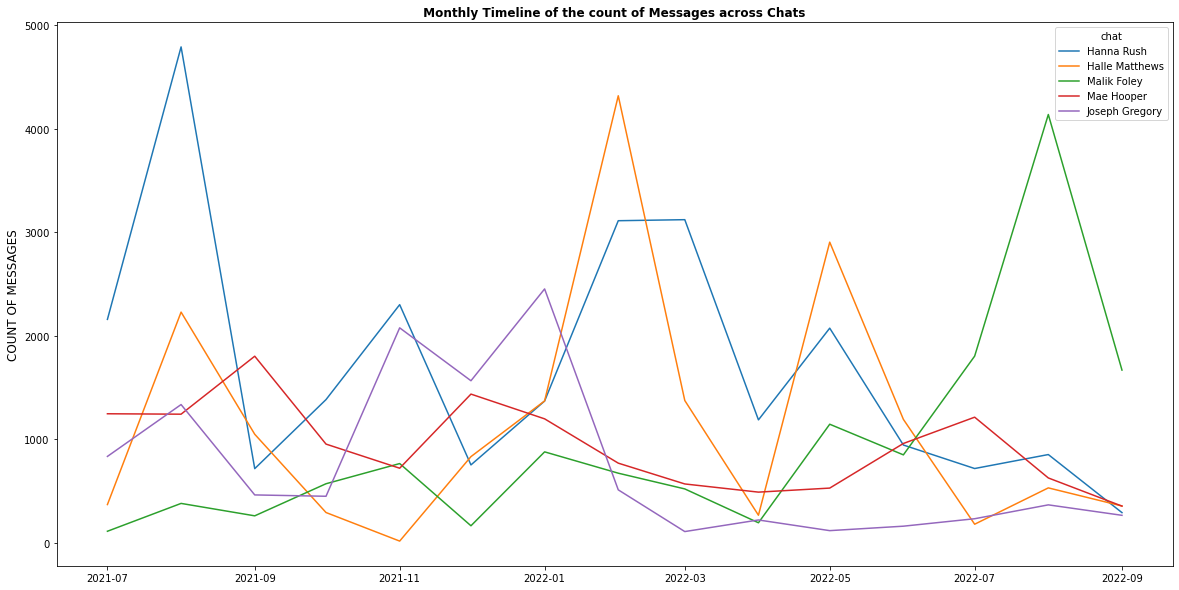

In [42]:
stats.plot.line(per_chat=True,n=5,dt_range=None)

If a line plot is too messy or difficult to interpret, you can try using an area chart instead. An area chart is similar to a line plot, but it fills in the area underneath the line with a color or pattern.<br>
To create an area chart, you can set the `area` parameter to `True`

<AxesSubplot:title={'center':' Monthly Timeline of the count of Messages across Chats '}, ylabel='COUNT OF MESSAGES'>

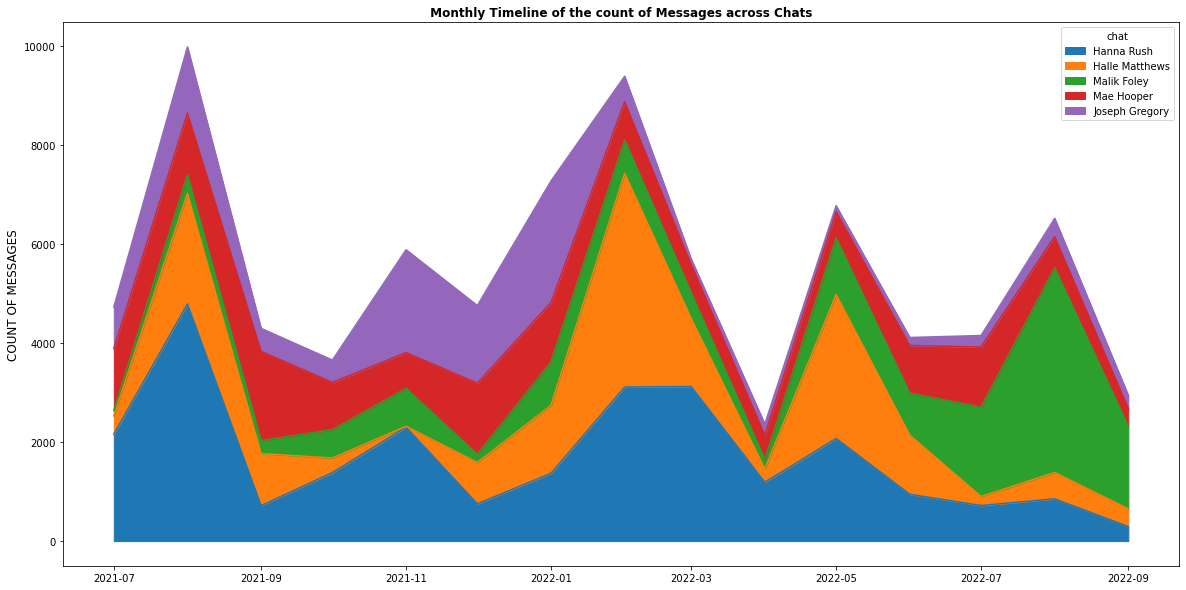

In [43]:
stats.plot.line(per_chat=True,dt_range=None,area=True)

To create an area chart that shows the cumulative total for each chat, you can set `per_chat` parameter to `True`, `area` parameter to `True`, and `cumulative` parameter to `True`

<AxesSubplot:title={'center':'Cumulative Monthly Timeline of the count of Messages across Chats (Running SUM)'}, ylabel='COUNT OF MESSAGES'>

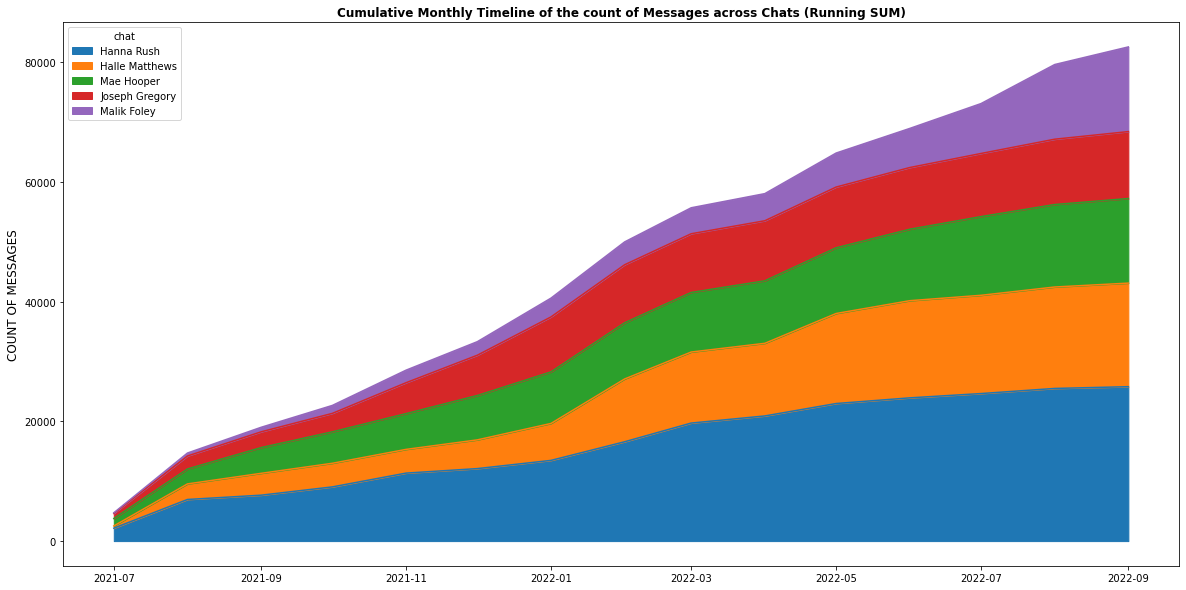

In [44]:
stats.plot.line(per_chat=True,dt_range=None,area=True,cumulative=True)

To create chat subplots, set `per_chat` parameter to `True` and `subplots` parameter to `True`. This will plot a separate line for each chat, with each line on its own subplot.

array([<AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>,
       <AxesSubplot:>], dtype=object)

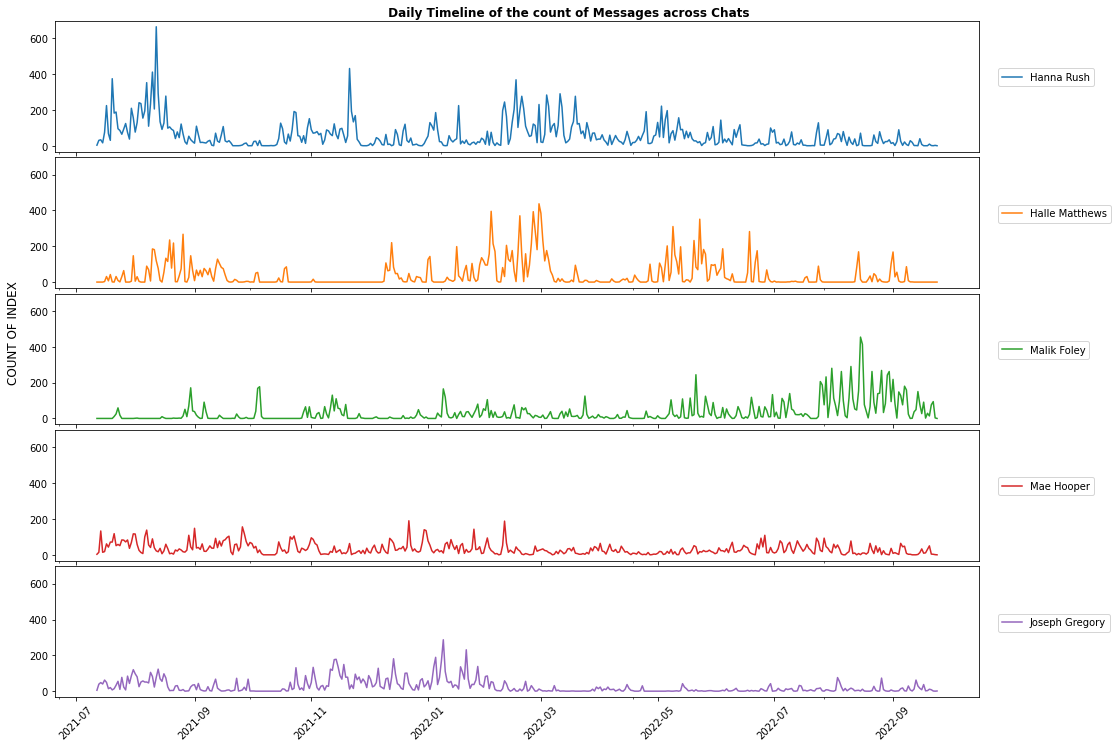

In [45]:
stats.plot.line(per_chat=True,dt_range=None,area=True,subplots=True,dt_hrchy='day',figsize=(15,10))

You can make it cummlative too.

array([<AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>,
       <AxesSubplot:>], dtype=object)

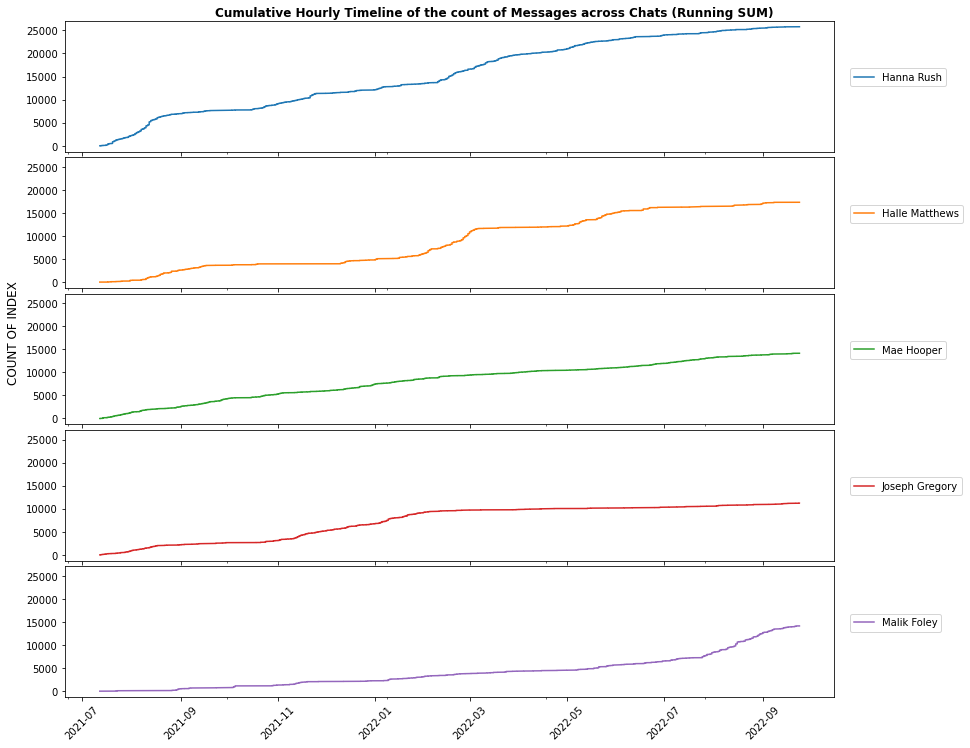

In [46]:
stats.plot.line(per_chat=True,dt_range=None,area=True,cumulative=True,subplots=True,dt_hrchy='hour',figsize=(13,10))

### Pie Charts

The `stats.plot.pie` method is used to create pie charts. Pie charts are useful for displaying the proportions or percentages of a whole.

<AxesSubplot:title={'center':'Chats proportion of Messages'}>

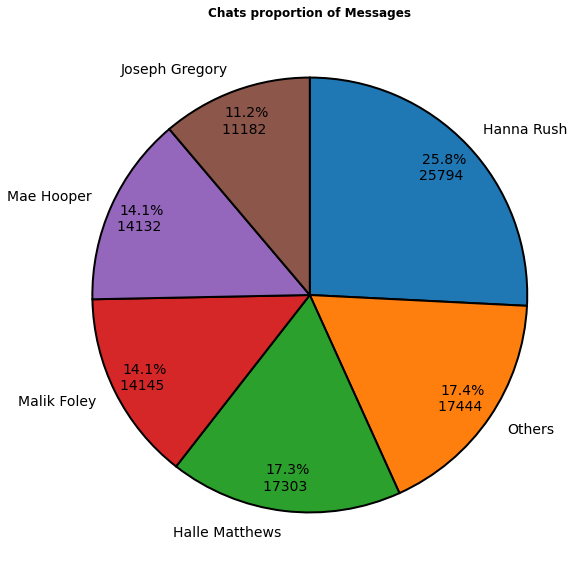

In [47]:
stats.plot.pie()

By default, the `others` parameter is set to `True`, which means that all chats that are not included in the plot will be grouped together and labeled as "Others" in the pie chart. This allows you to see the proportion of the selected chats against the total number of all chats. However, if you set the `others` parameter to `False`, the pie chart will only include the specified chats, and the proportions will be relative to the number of selected chats.

<AxesSubplot:title={'center':'Chats proportion of Messages'}>

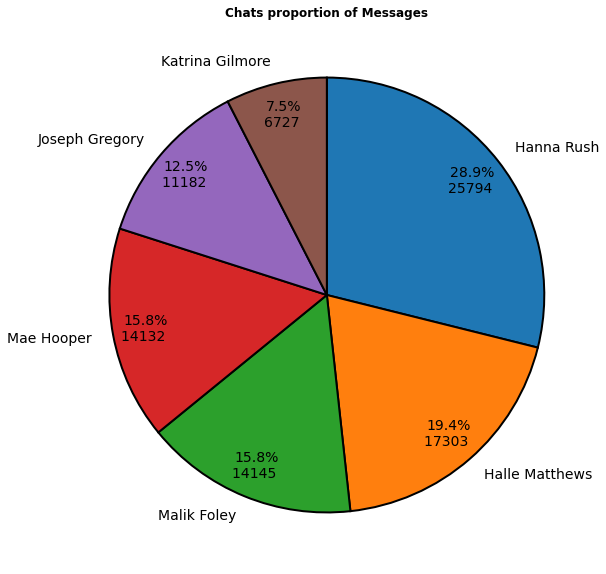

In [48]:
stats.plot.pie(others=False,n=6)

The parameters for filtering chats, and customizing appearance are still applicable here.
Set `label` to `False` to hide annotations of the proportions values and their percentages

<AxesSubplot:title={'center':'Chats proportion of Messages'}>

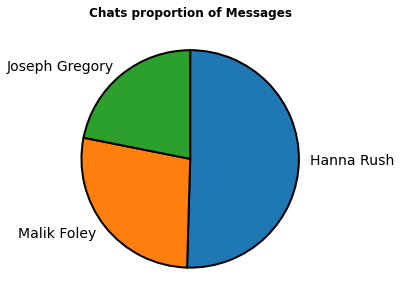

In [49]:
stats.plot.pie(others=False,figsize=(5,5),label=False,include=['Hanna Rush','Malik Foley','Joseph Gregory'])

### Sunburst chart
`stats.plot.sunburst` generates a sunburst chart from a data set. A sunburst chart is a visual representation that is used to display hierarchical data.

<AxesSubplot:title={'center':'Messages proportion by Chat, Sender'}>

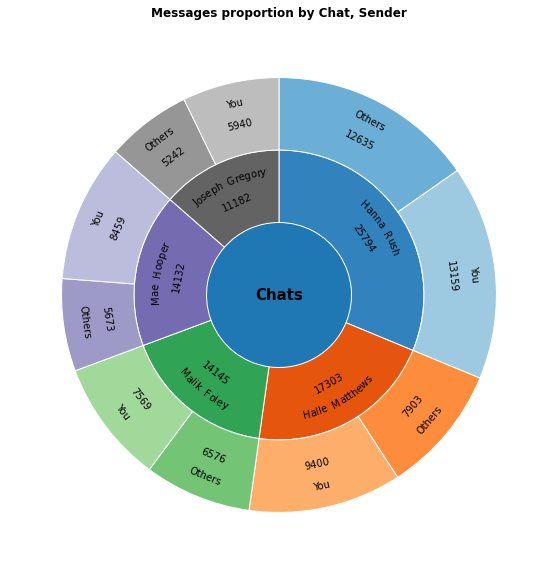

In [50]:
stats.plot.sunburst()

More about sunburst customizations will be covered later.

### Dot plot

`stats.plot.dot` is used to generate a dot plot.
A dot plot is a type of chart that is used to visualize the distribution of data over time. so you can use it to see how your messages are distributed over time. This can be useful for identifying trends or patterns in your messaging behavior, such as whether you tend to send more messages at certain times of the day or on certain days of the week. 

<AxesSubplot:title={'center':'Day vs. Month'}>

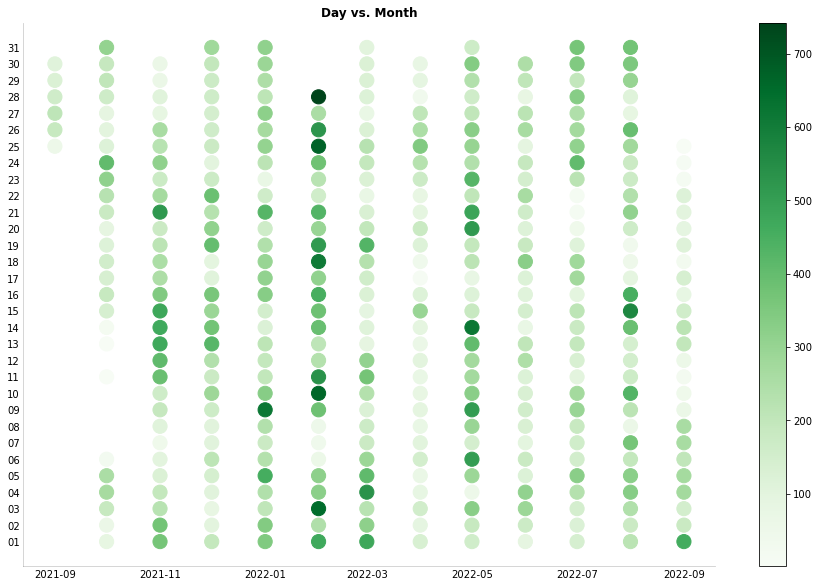

In [51]:
stats.plot.dot()

Also, you can use it to compare the distribution of messages between different chats over time.

<AxesSubplot:title={'center':'Month vs. Chat'}>

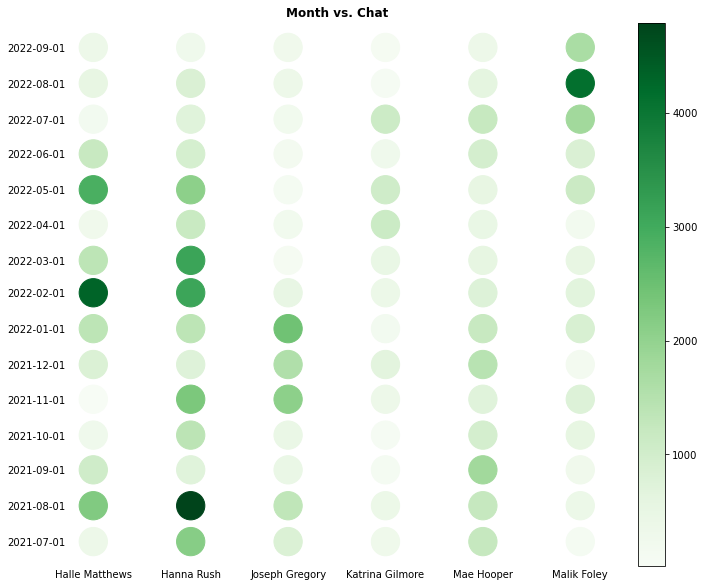

In [52]:
stats.plot.dot(x='chat',y='month',disc=False,dt_range=None,size=800,figsize=(12,10),n=6)

More about dot customizations will be covered later.

### Gantt chart

Gantt chart can be used to visualize your messaging behavior over time, such as the days and times you typically send and receive messages, and how frequently you chat with different people. 
`stats.plot.gantt_chart` is used to make Gantt chart.

<AxesSubplot:title={'center':'Daily active Messages sending across Chats'}>

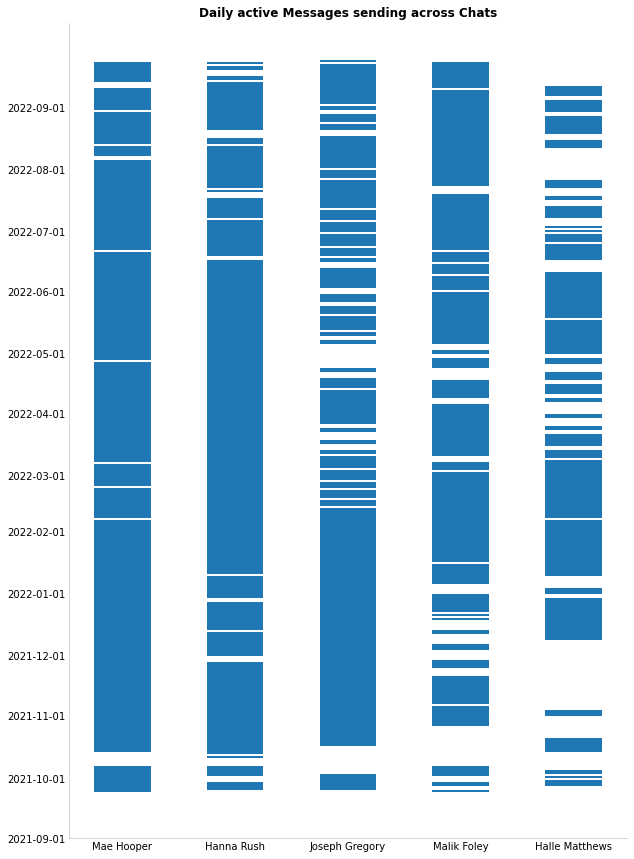

In [53]:
stats.plot.gantt_chart()

The parameters for filtering chats, customizing appearance, and some of manipulating datetime, are still applicable here.
For more information about Gantt chart customizations, check the documentation.

### Ranking
Is used to apply multi-level (chained) aggregation on chat data.

<AxesSubplot:title={'center':'Highest Monthly Count of Messages By Chat -Timeline'}, ylabel='COUNT OF MESSAGES'>

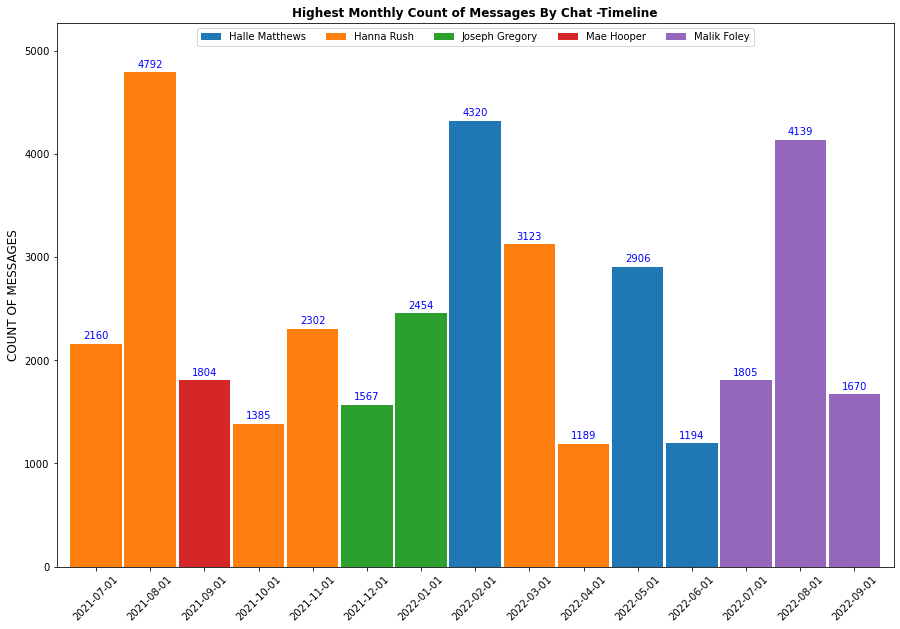

In [54]:
#the highest number of messages sent by one person for every month
stats.plot.ranking(dt_hrchy='month')

The `rank` parameter is used to sort the bars in order by value instead of showing a sequential timeline of bars.

<AxesSubplot:title={'center':'Highest Monthly Count of Messages By Chats(Ranked)'}, xlabel='COUNT OF MESSAGES'>

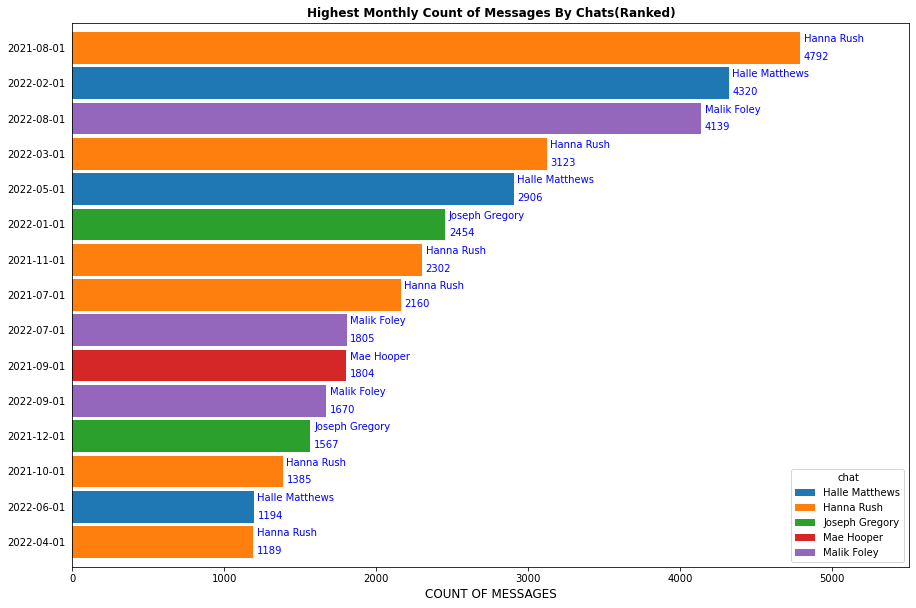

In [55]:
#the highest number of messages sent by one person per month --sorted
stats.plot.ranking(dt_hrchy='month',dt_range=None,rank=True)

<AxesSubplot:title={'center':'Highest Daily Count of Messages By Chats(Ranked)'}, xlabel='COUNT OF MESSAGES'>

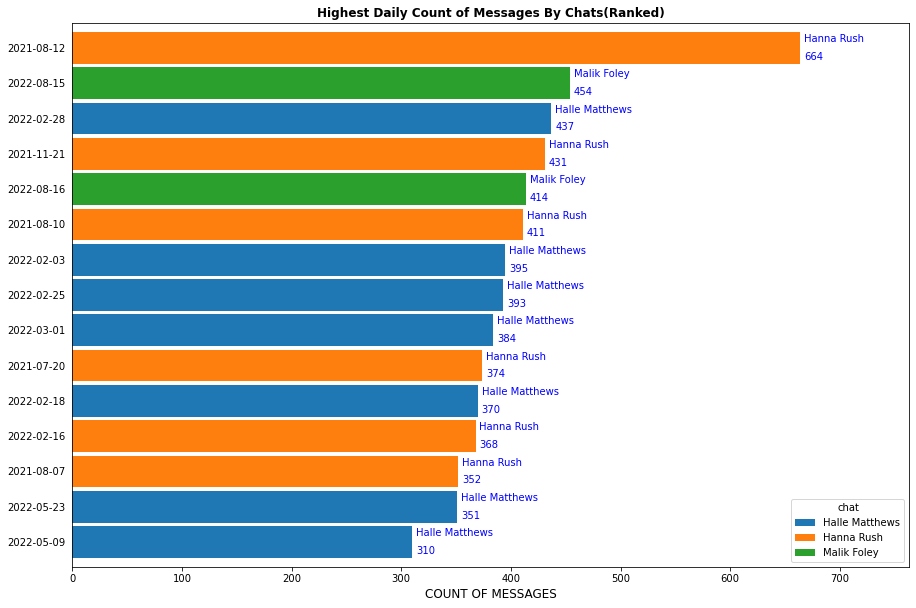

In [56]:
#the highest number of messages sent by one person per day --sorted
stats.plot.ranking(dt_hrchy='day',dt_range=None,rank=True)

<AxesSubplot:title={'center':'Most #Of Messages Sent In One Day Per Chat'}, ylabel='COUNT OF MESSAGES'>

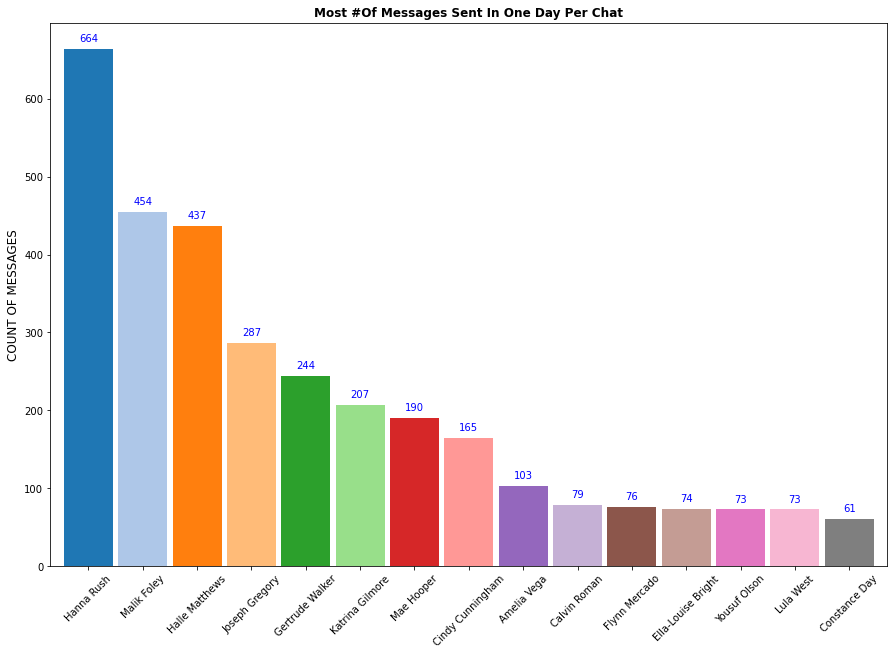

In [75]:
#the highest number of messages sent in one day for each chat
stats.plot.ranking(key='cat',dt_hrchy='day',dt_range=None,rank=True)

<AxesSubplot:title={'center':'The Total Number of Times a Chat Had The Highest Daily Count of Messages'}>

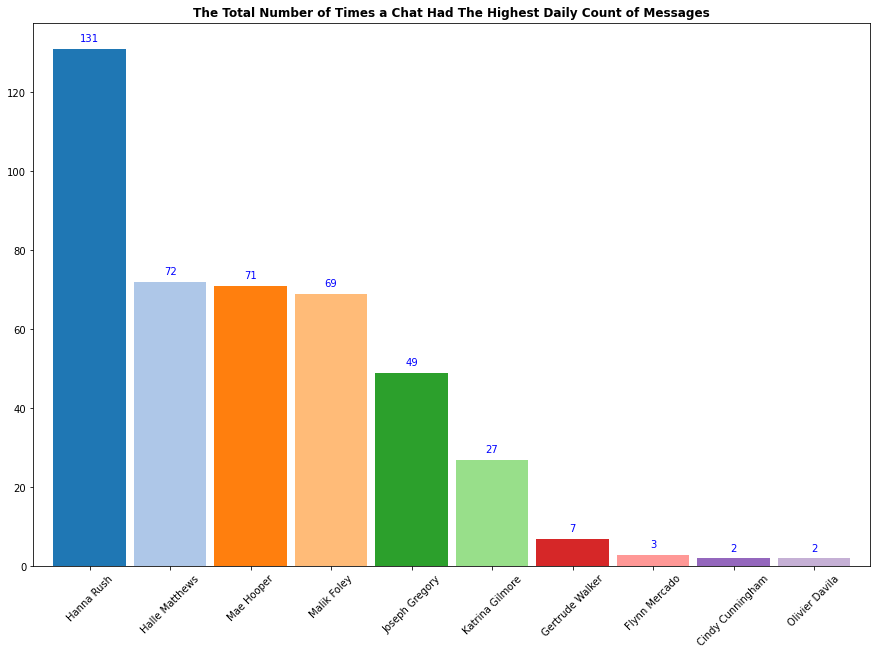

In [58]:
"""total number of times a chat had the highest daily count of messages. This information can be useful for 
understanding which chats are the most active in terms of the number of messages being sent on a daily basis,
and comparing the relative activity of different chats."""
stats.plot.ranking(key='cat',dt_hrchy='day',count_of_maxs=True,n=10)

For more information about the parameters accepted by the `ranking()` method, you can refer to its documentation.

Now that we have gained insights about the data for all chats, let's move on to analyzing the data for a single chat.

## Chat instances

To load chat instances, set `chat_instances` parameter to `True` when calling the `.load()` method. This will load all chat instances. You can also specify specific chats to load by passing a list of chat names to `chat_instances` parameter.<br>

Now let's reload to include chat instances

In [59]:
#loading specific chats.
stats.load(SubModules=[],chat_instances=['Hanna Rush'])

Create Chat instances ...


100%|████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  9.17it/s]


In [60]:
#loading All chats.
stats.load(SubModules=[],chat_instances=True)

Create Chat instances ...
Adding new chats


100%|████████████████████████████████████████████████████████████████████████████████| 128/128 [00:01<00:00, 74.20it/s]


Update existing chats


100%|███████████████████████████████████████████████████████████████████████████████| 129/129 [00:00<00:00, 586.36it/s]


Note how new chats are gradually added to the existing ones. This behavior also applies when loading new submodules.

`stats['chat_name']` syntax is used to access a specific chat instance from the stats object. This will return a chat instance object containing information and analysis of the chat data for the chat with the name 'chat_name'.

In [61]:
chat_stats=stats['Hanna Rush']

### Chat object has the following attributes:

`data`: a pandas DataFrame containing a subset of the data for the selected chat<br>
`name`: the name of the chat as it appears in messenger<br>
`n_of_messages`: the total number of messages in the chat<br>
`languages`: a dictionary containing information about the languages used in the chat and their percentages<br>
`chat_starter`: the name of the person who started the conversation<br>
`first_msg_date`: the date of the first message in the chat<br>
`n_of_distinct_days`: the total number of different days you chatted on<br>
`longest_streak`: the longest number of days of continuous chatting or "chatting streak"<br>
`streak_periods`: a dictionary containing information about the period in which you achieved the longest streak<br>
`last_hear`: the time of the last message between you in the chat<br>
`longest_msgs`: a pandas DataFrame containing information about the longest 10 messages in terms of word count<br>


In [62]:
print(f'The name of the chat : {chat_stats.name}')
print(f'The count of messages in the chat : {chat_stats.n_of_messages}')
print(f'Languages used in the chat and their percentages : {chat_stats.languages}')
print(f'The person who started the conversation was : {chat_stats.chat_starter}')
print(f'The date of the first message : {chat_stats.first_msg_date}')
print(f'The count of unique chatting days : {chat_stats.n_of_distinct_days}')
print(f'Longest chatting streak : {chat_stats.longest_streak}')
print(f'Longest streak details :\n \t{chat_stats.streak_periods}')
print(f'Date of last message : {chat_stats.last_hear}')

The name of the chat : Hanna Rush
The count of messages in the chat : 25794
Languages used in the chat and their percentages : [{'ARABIC': '99%'}]
The person who started the conversation was : Hsan Ali
The date of the first message : 2021-07-12 15:40:29.919000
The count of unique chatting days : 402
Longest chatting streak : 157
Longest streak details :
 	[{'Start': '2022-01-11', 'End': '2022-06-16'}]
Date of last message : 2022-09-23 23:01:36.398000


### Chat plotting
All methods has as most of the same parameters as `stats.plot.bar`, but it does not have parameters for filtering data by chat. 

#### Bar plot
Make bars vs. datetime.<br>

<AxesSubplot:title={'center':' Monthly Timeline of the count of Chat messages '}, ylabel='COUNT OF CHAT MESSAGES'>

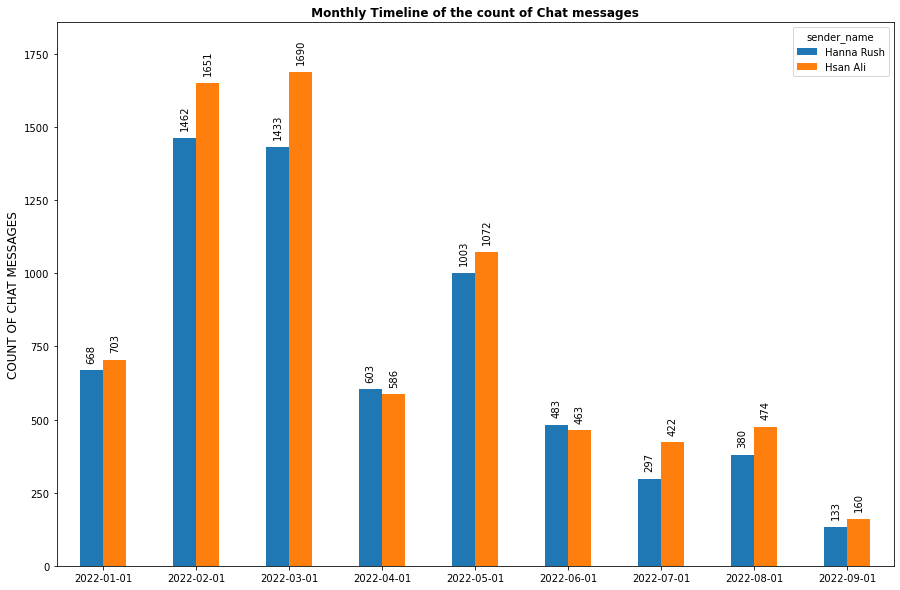

In [63]:
chat_stats.plot.bar(stacked=False,dt_range=['2022','End'],figsize=(15,10),rot=0)

#### Line plot

<AxesSubplot:title={'center':' Monthly Timeline of the count of Chat messages '}, ylabel='COUNT OF CHAT MESSAGES'>

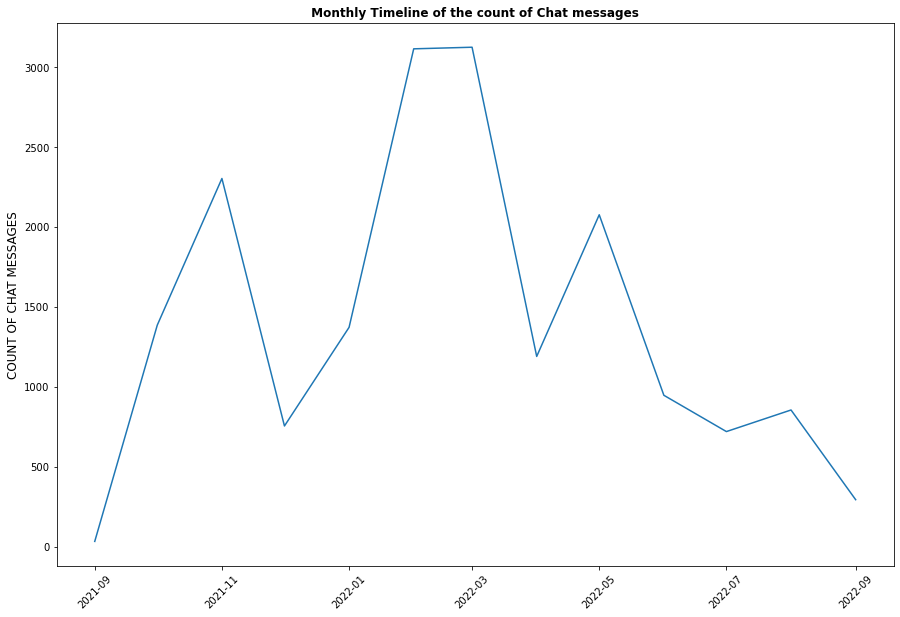

In [64]:
chat_stats.plot.line()

<AxesSubplot:title={'center':'Cumulative Hourly Timeline of the count of Chat messages (Moving SUM with window = default)'}, ylabel='COUNT OF CHAT MESSAGES'>

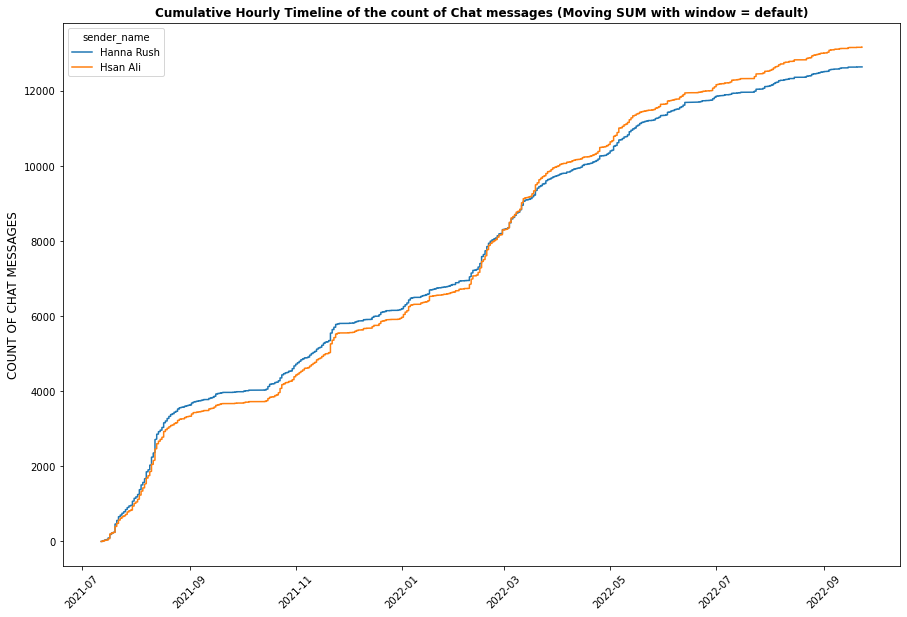

In [65]:
chat_stats.plot.line(show_sender=True,cumulative=True,dt_hrchy='hour',dt_range=None)

#### Pie chart

<AxesSubplot:title={'center':'Senders proportion of Chat messages'}>

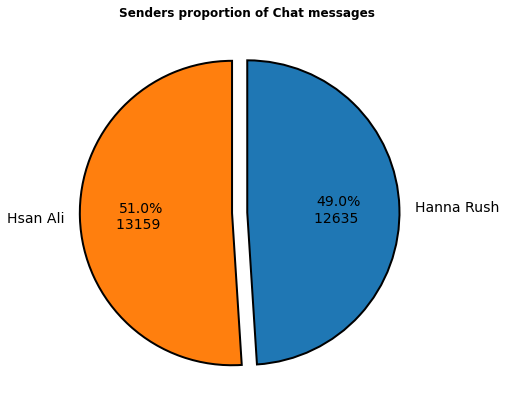

In [66]:
chat_stats.plot.pie(figsize=(7,7))

#### Dot plot

<AxesSubplot:title={'center':'Day vs. Month'}>

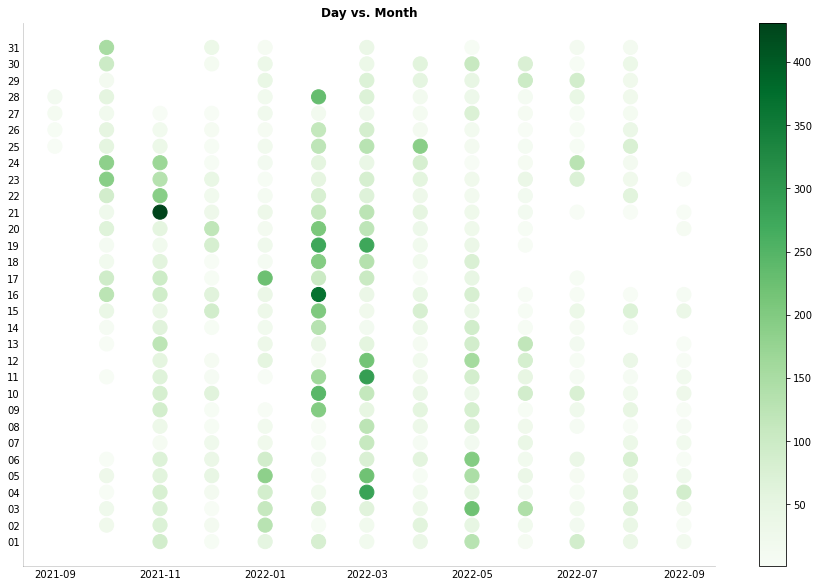

In [67]:
chat_stats.plot.dot()

#### Ranking

<AxesSubplot:title={'center':'Highest Monthly Count of Chat messages By Sender -Timeline'}, ylabel='COUNT OF CHAT MESSAGES'>

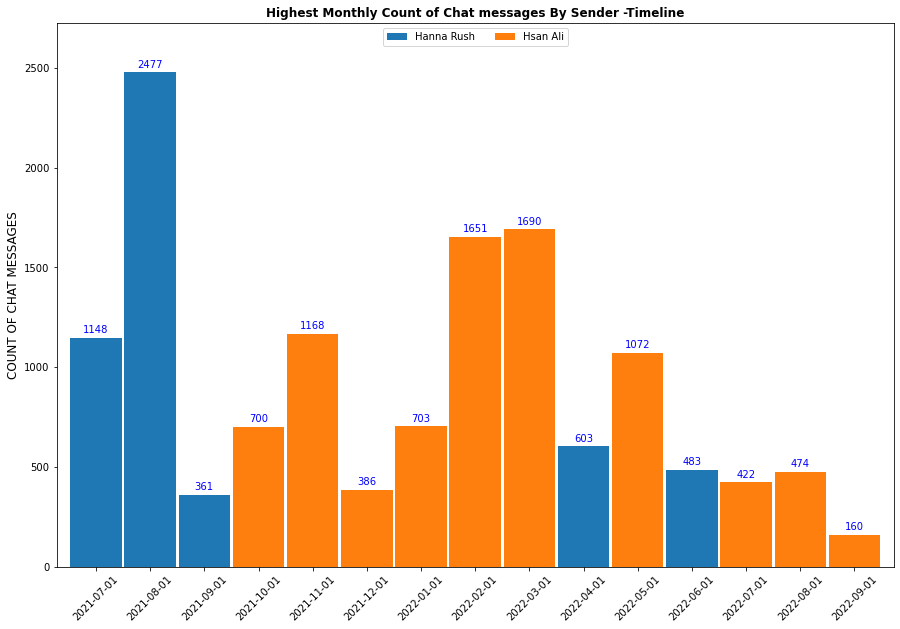

In [68]:
chat_stats.plot.ranking(dt_hrchy='month')

<AxesSubplot:title={'center':'Highest Weekly Count of Chat messages By Senders(Ranked)'}, xlabel='COUNT OF CHAT MESSAGES'>

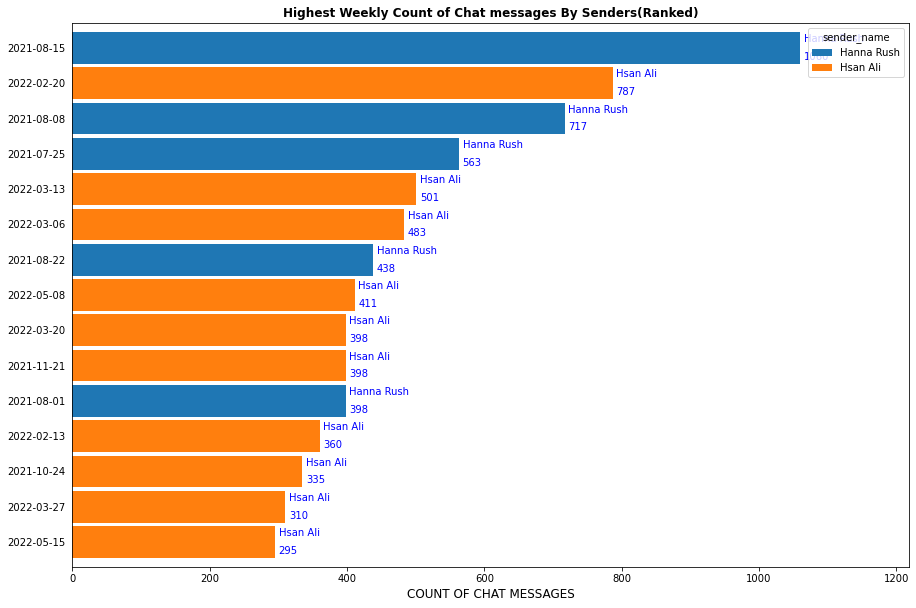

In [69]:
chat_stats.plot.ranking(rank=True,dt_hrchy='week',dt_range=None)